# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [3]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [ ]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [ ]:
# 한글 표시를 위한 라이브러리 설치
#!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [253]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [255]:

apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,56962000,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,63062000,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,72190000,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,101516666,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,55227500,340148.333333


In [11]:
apart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      345 non-null    object 
 1   총세대수      345 non-null    int64  
 2   지역        345 non-null    object 
 3   준공연도      345 non-null    int32  
 4   건물형태      345 non-null    object 
 5   난방방식      345 non-null    object 
 6   승강기설치여부   345 non-null    object 
 7   실차량수      345 non-null    int64  
 8   총면적       345 non-null    float64
 9   면적10-30   345 non-null    int64  
 10  면적30-40   345 non-null    int64  
 11  면적40-50   345 non-null    int64  
 12  면적50-60   345 non-null    int64  
 13  면적60-70   345 non-null    int64  
 14  면적70-80   345 non-null    int64  
 15  면적80-140  345 non-null    int64  
 16  임대보증금     345 non-null    int32  
 17  임대료       345 non-null    float64
dtypes: float64(2), int32(2), int64(9), object(5)
memory usage: 45.9+ KB


In [13]:
apart.describe()


,총세대수,준공연도,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [27]:
apart.corr(numeric_only=True).style.background_gradient()


,총세대수,준공연도,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
총세대수,1.000000,0.085396,0.712475,0.927286,0.373339,0.597814,0.589794,0.387626,0.056001,0.092164,0.021211,0.172154,0.203985
준공연도,0.085396,1.000000,0.287266,0.171747,0.120319,-0.159878,-0.059953,0.079040,0.066059,0.248191,0.229966,0.331838,0.325513
실차량수,0.712475,0.287266,1.000000,0.822183,0.077284,0.211912,0.392055,0.381746,0.151615,0.339168,0.340284,0.361867,0.337066
총면적,0.927286,0.171747,0.822183,1.000000,0.174025,0.410497,0.486441,0.457999,0.102296,0.327435,0.304440,0.361495,0.368626
면적10-30,0.373339,0.120319,0.077284,0.174025,1.000000,0.161576,0.047730,-0.124520,-0.016124,-0.063058,-0.084182,-0.087044,-0.062674
면적30-40,0.597814,-0.159878,0.211912,0.410497,0.161576,1.000000,0.376596,-0.132072,-0.043037,-0.168306,-0.224689,-0.121064,-0.085508
면적40-50,0.589794,-0.059953,0.392055,0.486441,0.047730,0.376596,1.000000,-0.074343,-0.038634,-0.151085,-0.201694,-0.069538,-0.068149
면적50-60,0.387626,0.079040,0.381746,0.457999,-0.124520,-0.132072,-0.074343,1.000000,-0.029779,-0.078286,-0.125007,0.141206,0.164231
면적60-70,0.056001,0.066059,0.151615,0.102296,-0.016124,-0.043037,-0.038634,-0.029779,1.000000,0.265453,-0.016725,0.032534,0.114207
면적70-80,0.092164,0.248191,0.339168,0.327435,-0.063058,-0.168306,-0.151085,-0.078286,0.265453,1.000000,0.550601,0.444749,0.480862


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [30]:
apart.describe()


,총세대수,준공연도,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [257]:
apart.isna().sum()


단지코드        0
총세대수        0
지역          0
준공연도        0
건물형태        0
난방방식        0
승강기설치여부     0
실차량수        0
총면적         0
면적10-30     0
면적30-40     0
면적40-50     0
면적50-60     0
면적60-70     0
면적70-80     0
면적80-140    0
임대보증금       0
임대료         0
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [73]:
# 함수 만들기
def continuous(col):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    sns.histplot(x=col, bins=20, kde=True)
    plt.grid()
    
    plt.subplot(2,1,2)
    sns.boxplot(x=col)
    plt.grid()
    plt.show()


#### 1) 실차량수

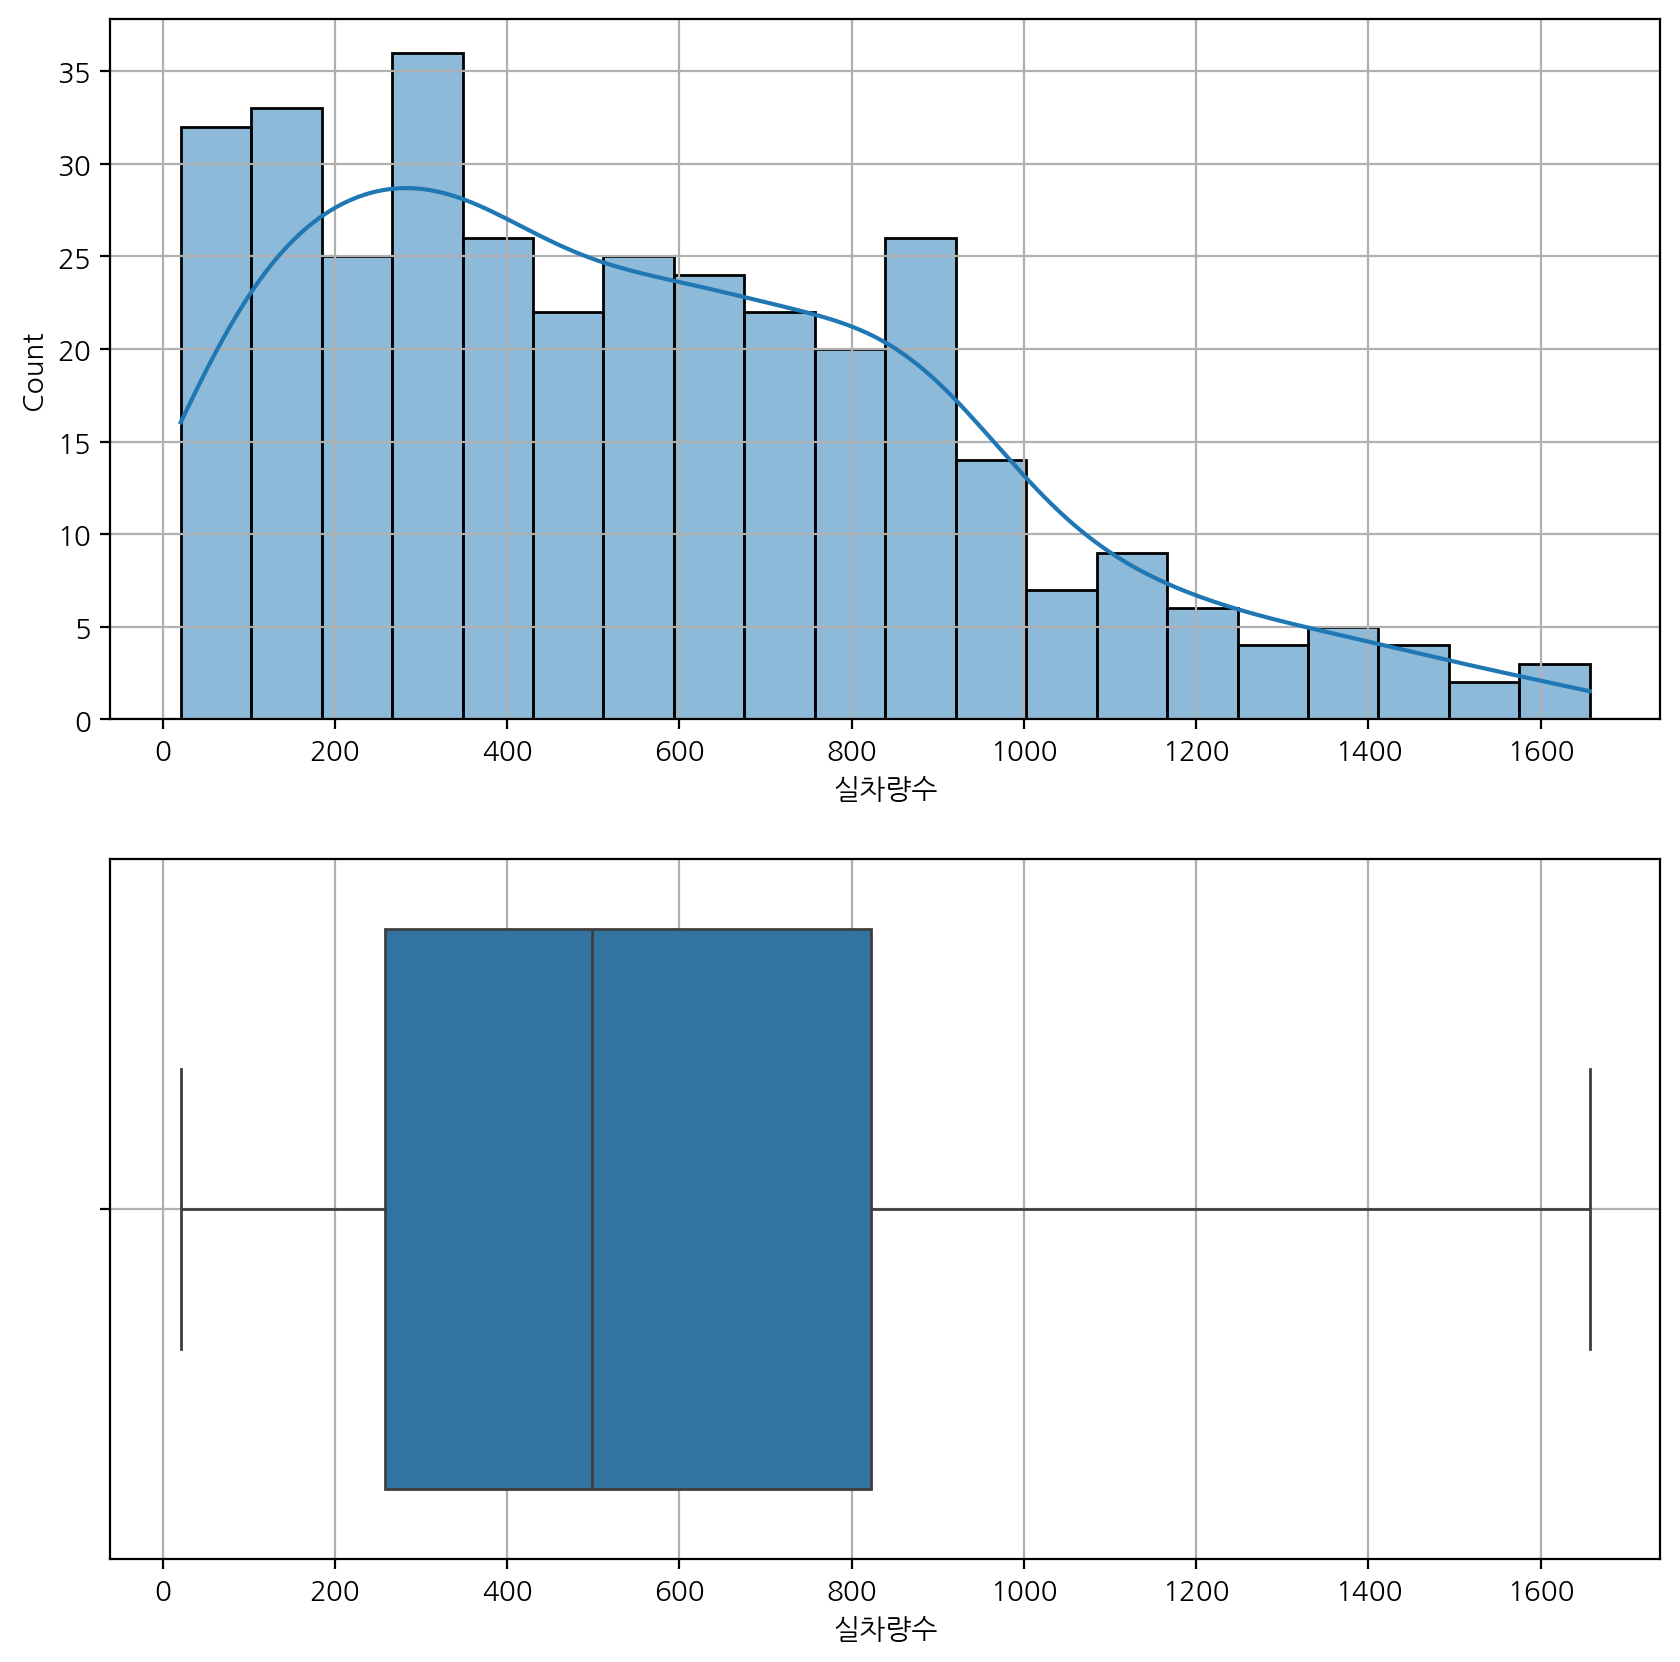

In [259]:
continuous(apart['실차량수'])


#### 2) 총세대수

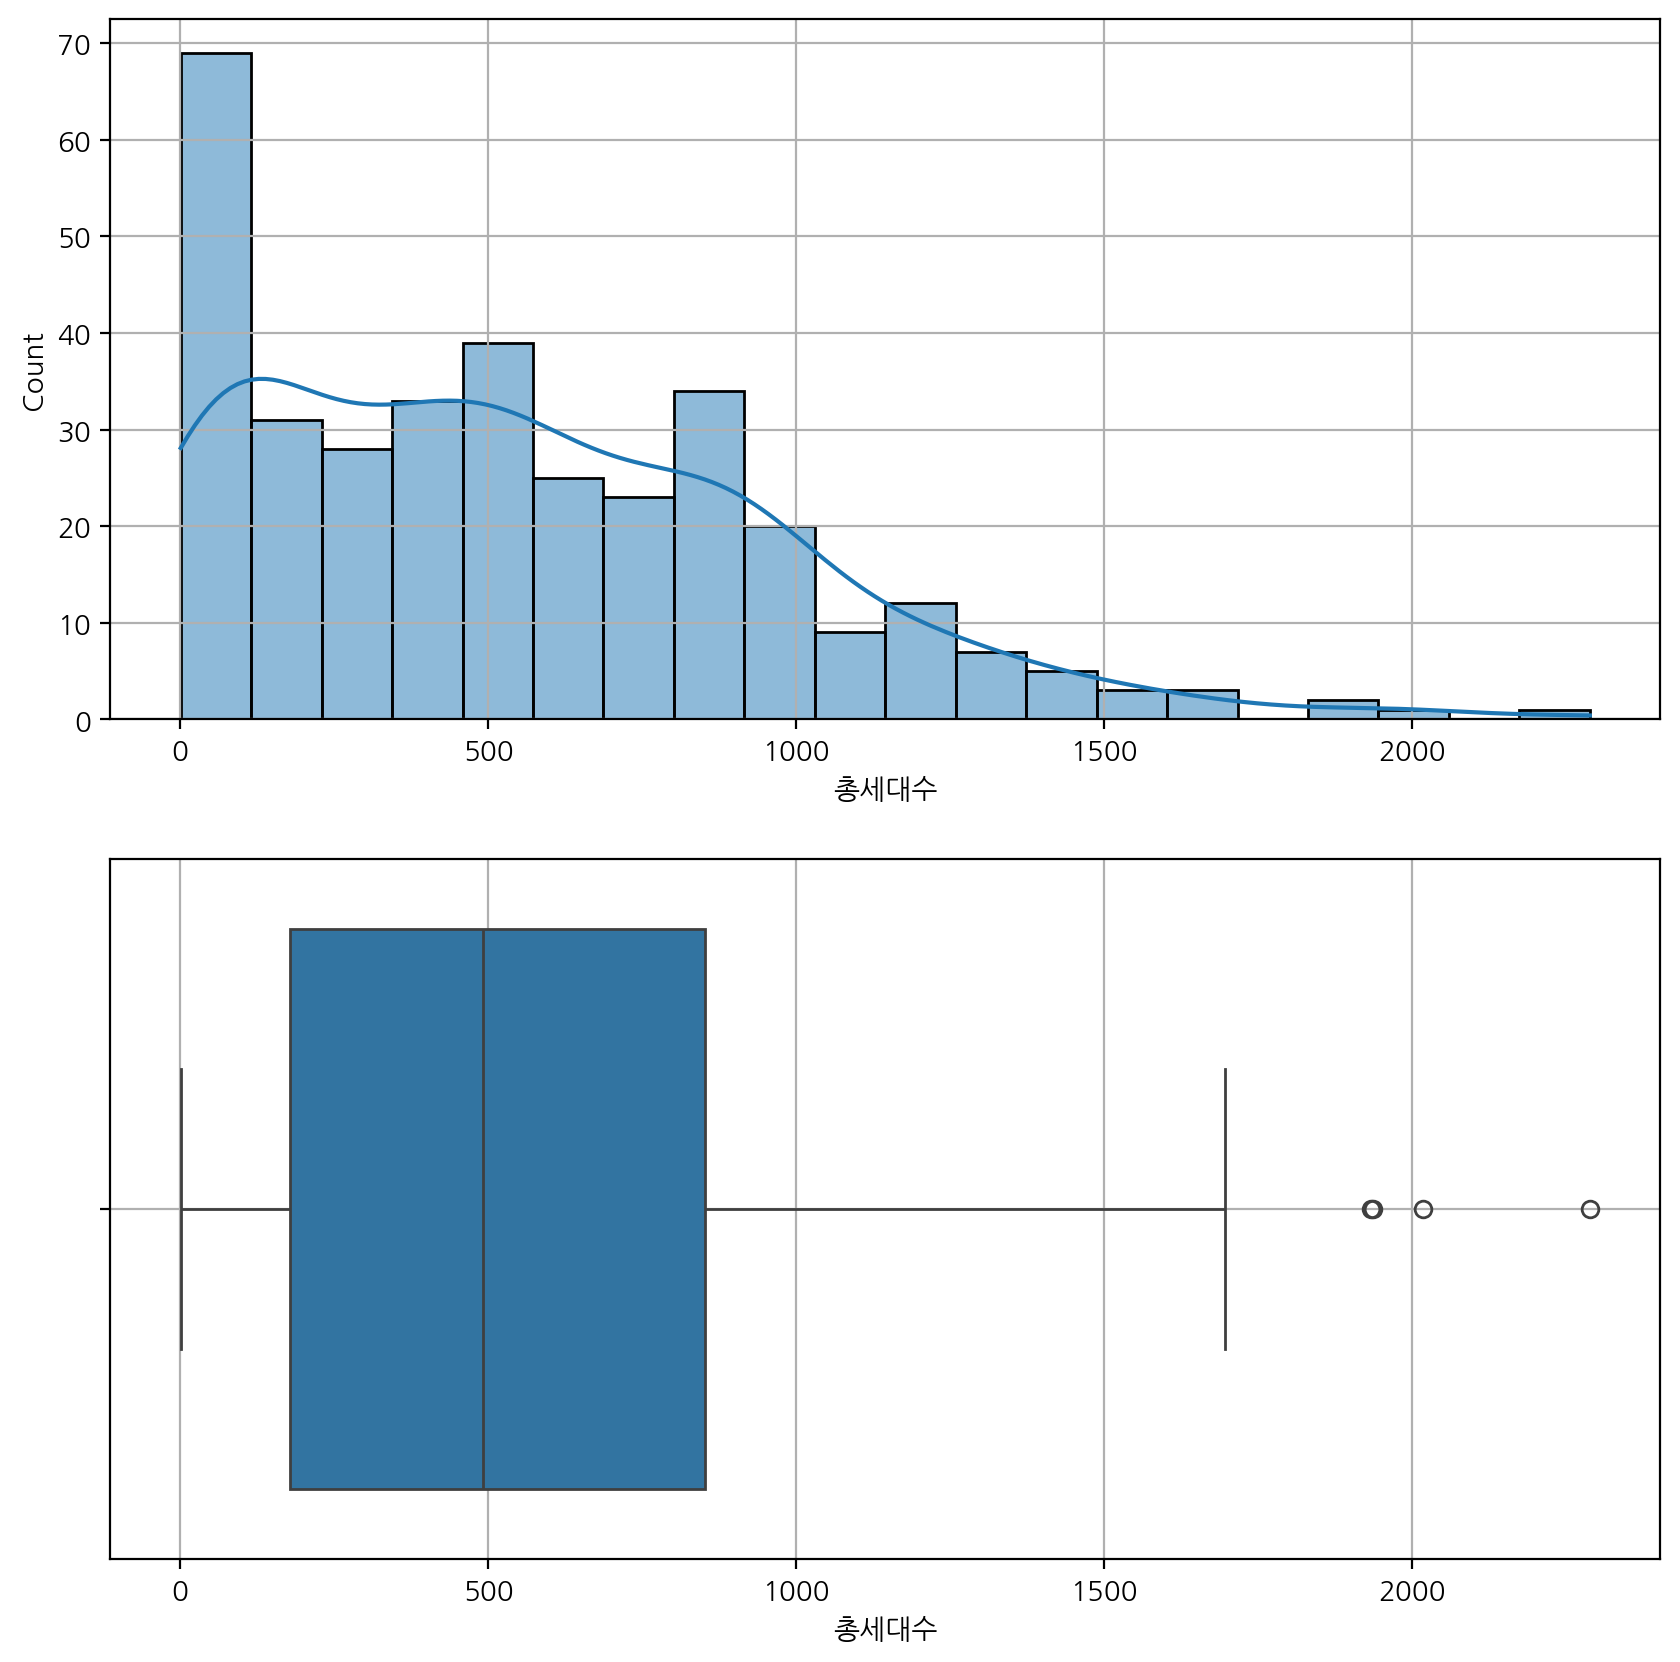

In [77]:
continuous(apart['총세대수'])


#### 3) 총면적

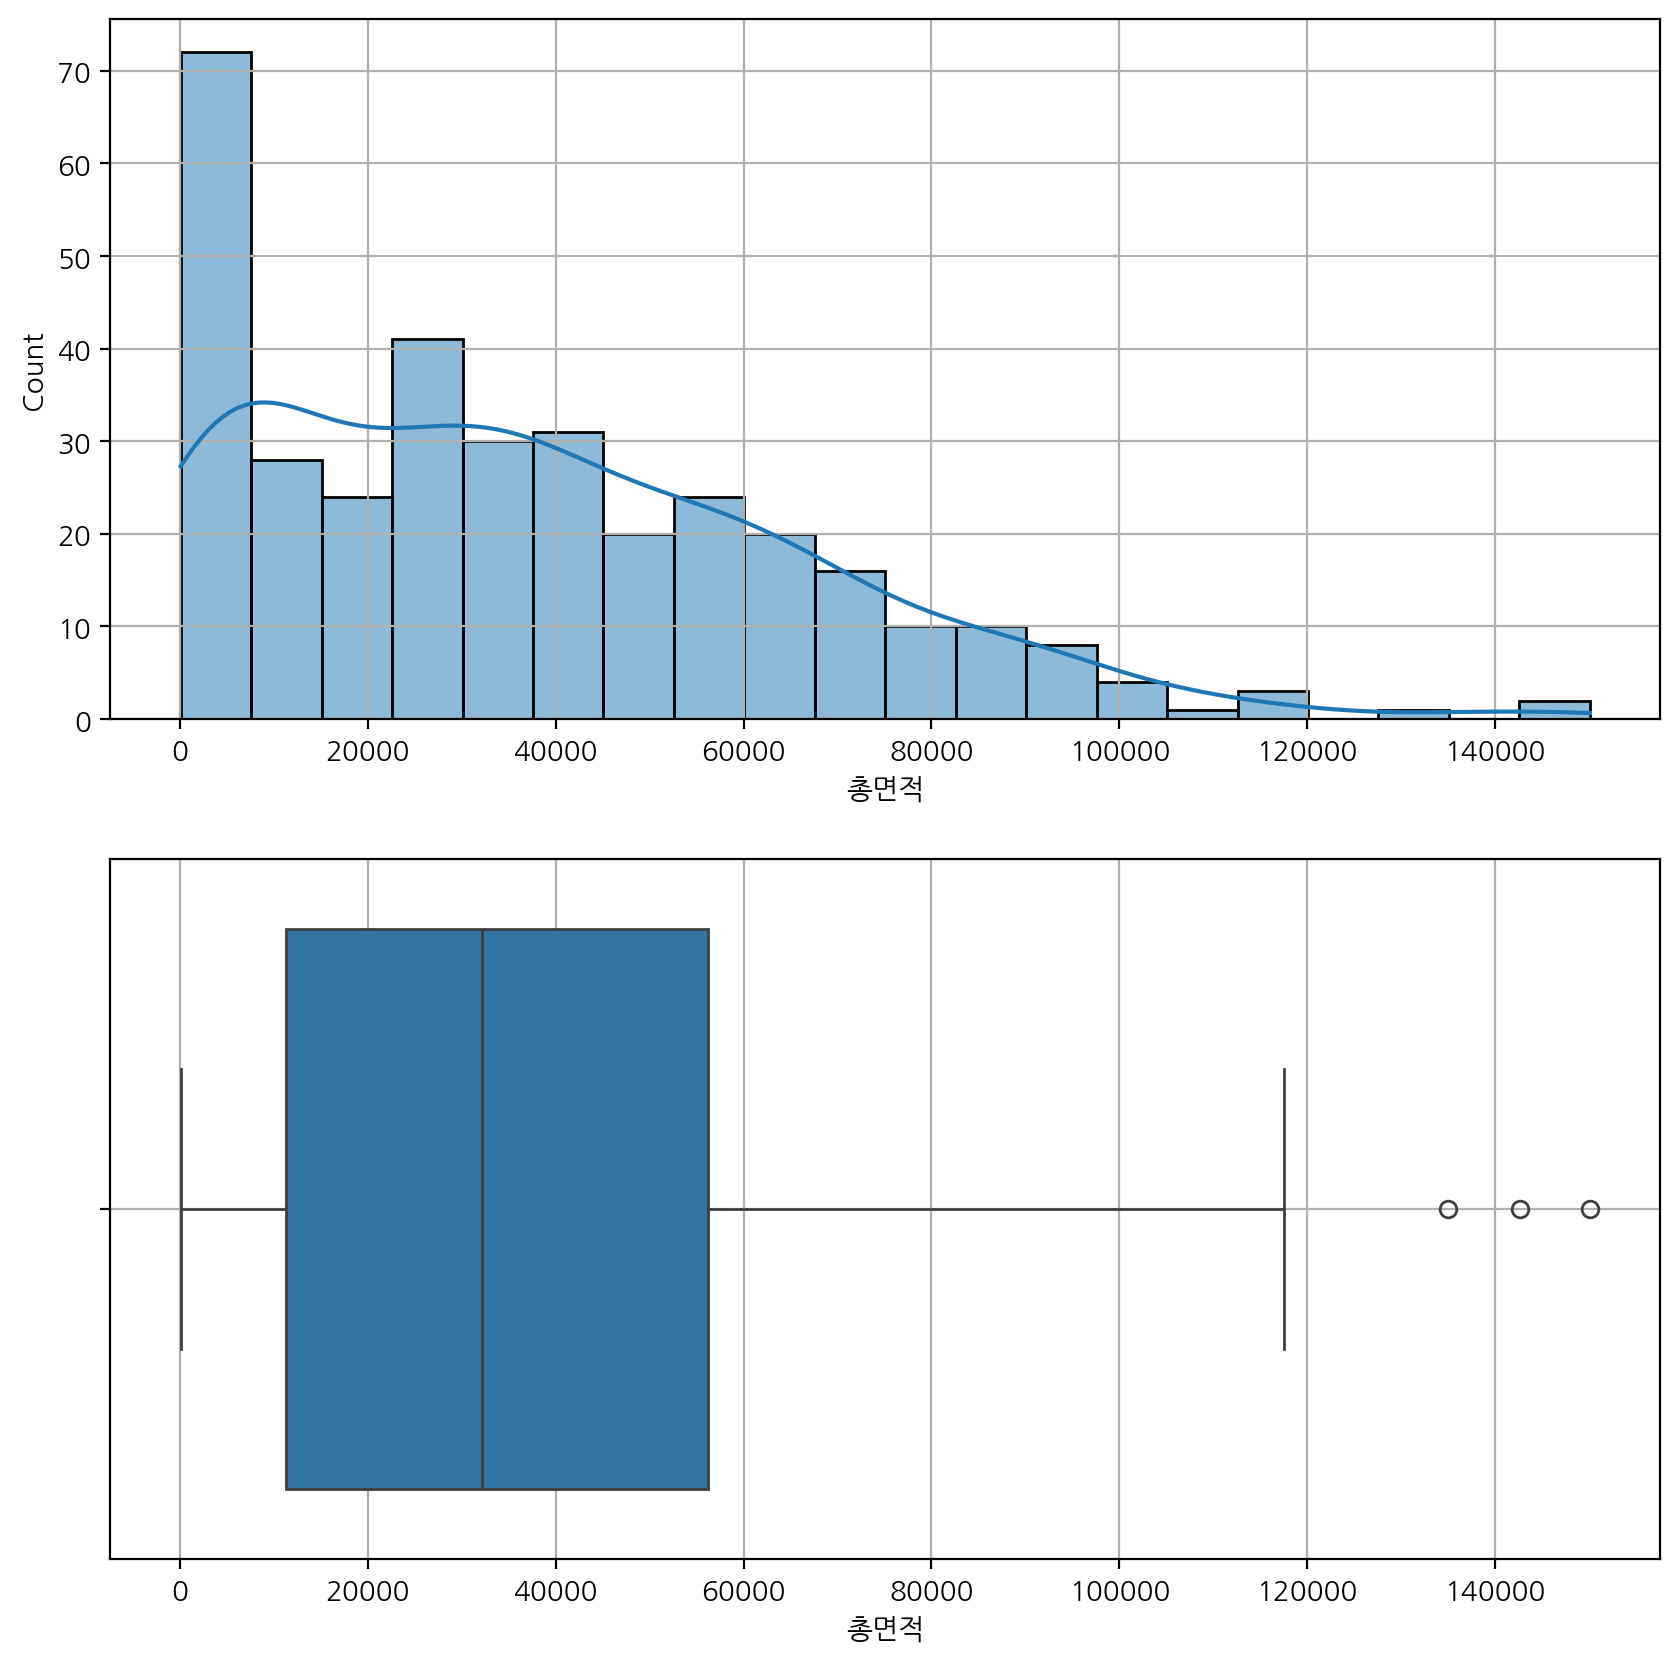

In [79]:
continuous(apart['총면적'])


#### 4) 준공연도

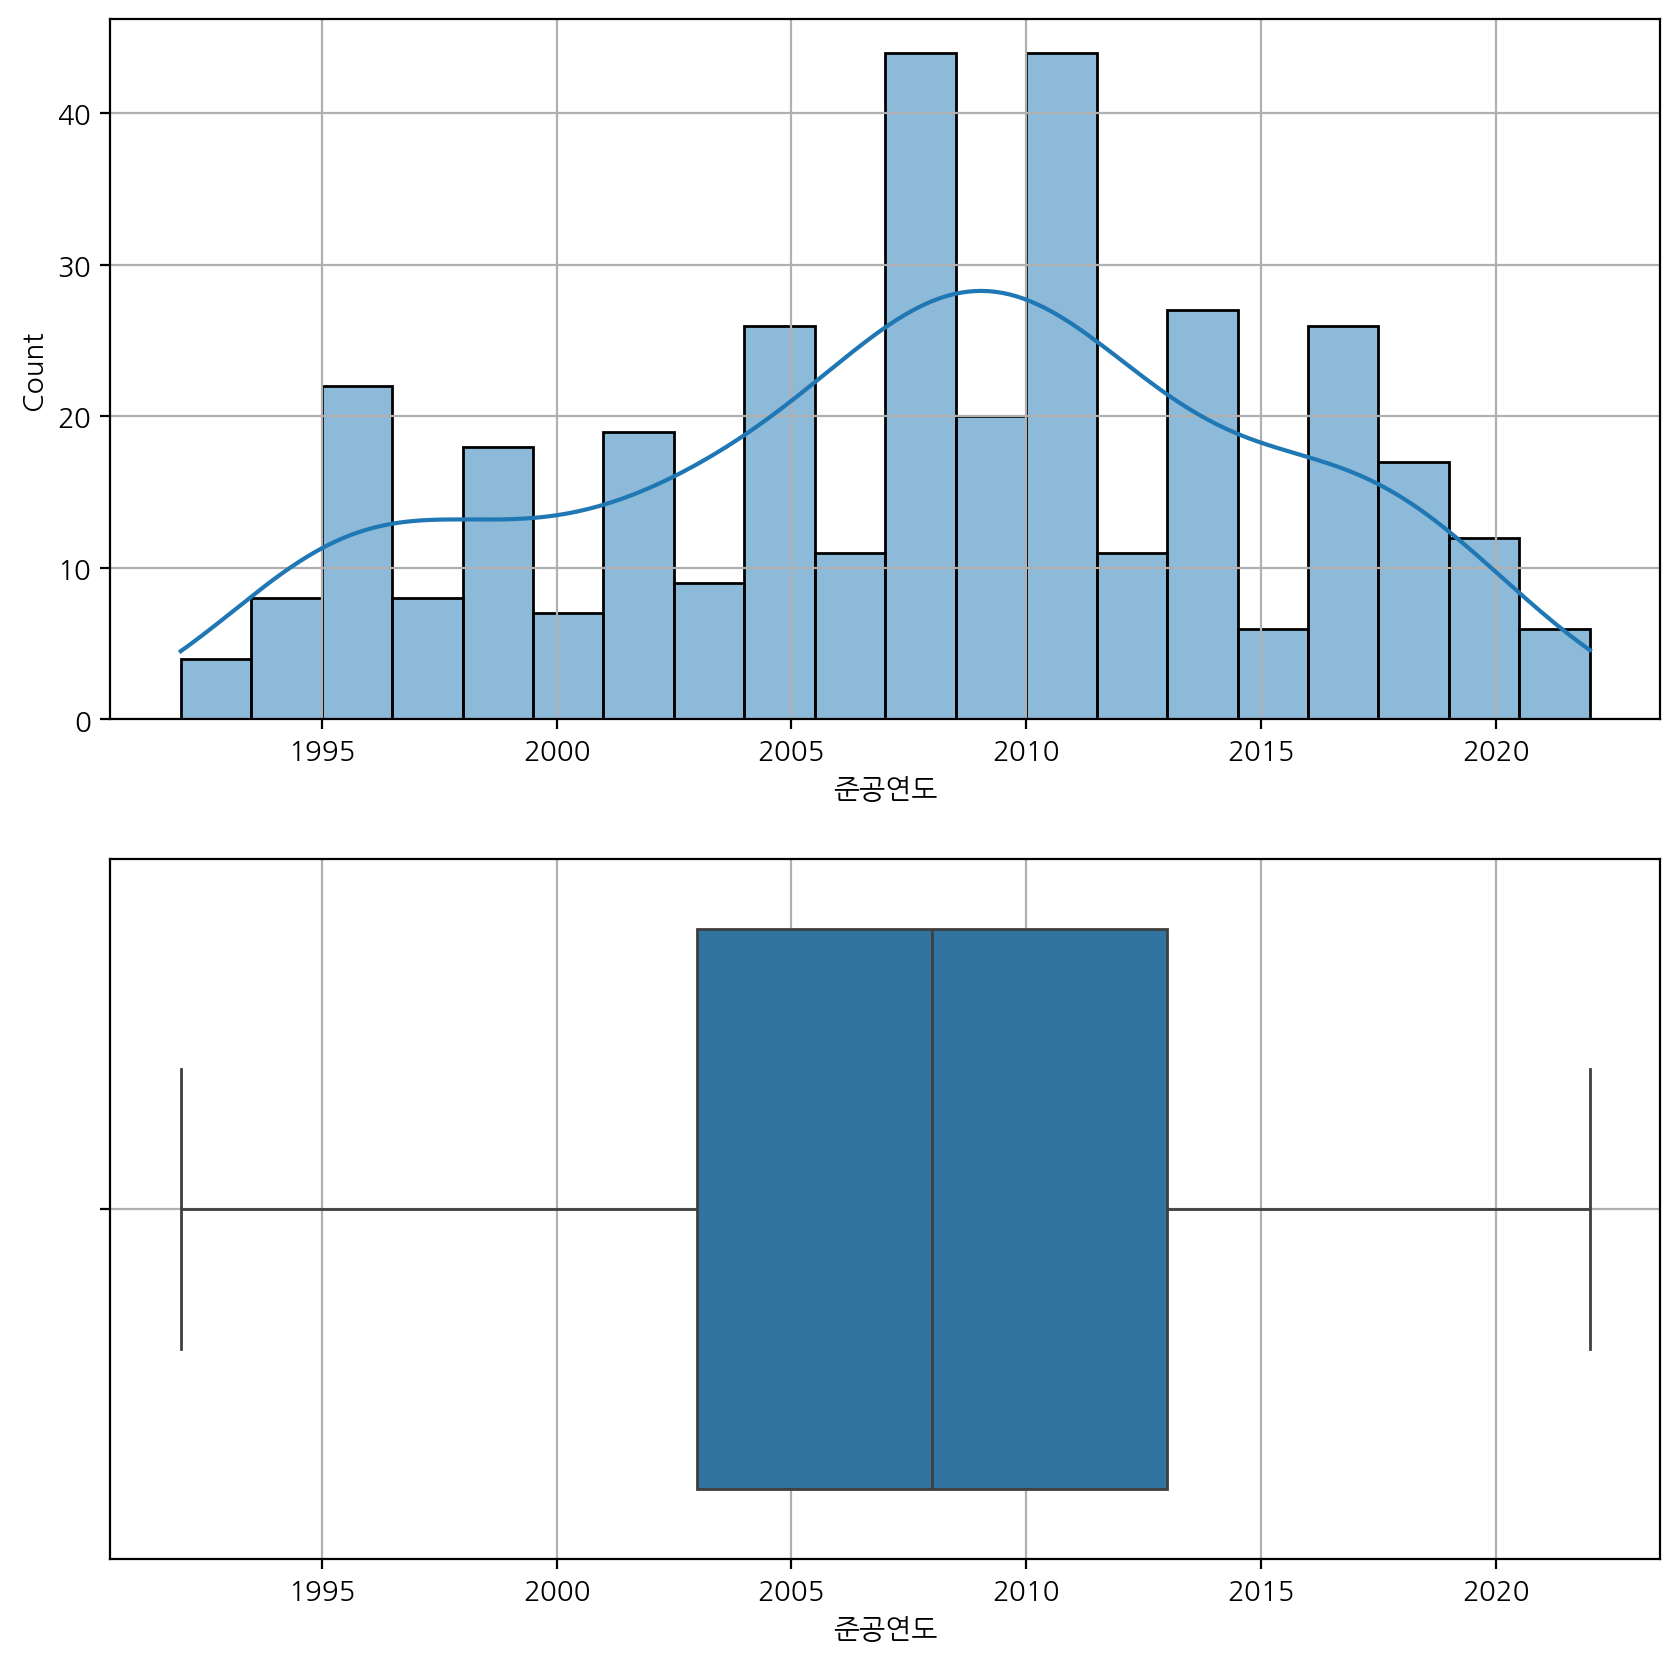

In [81]:
continuous(apart['준공연도'])


#### 5) 임대료

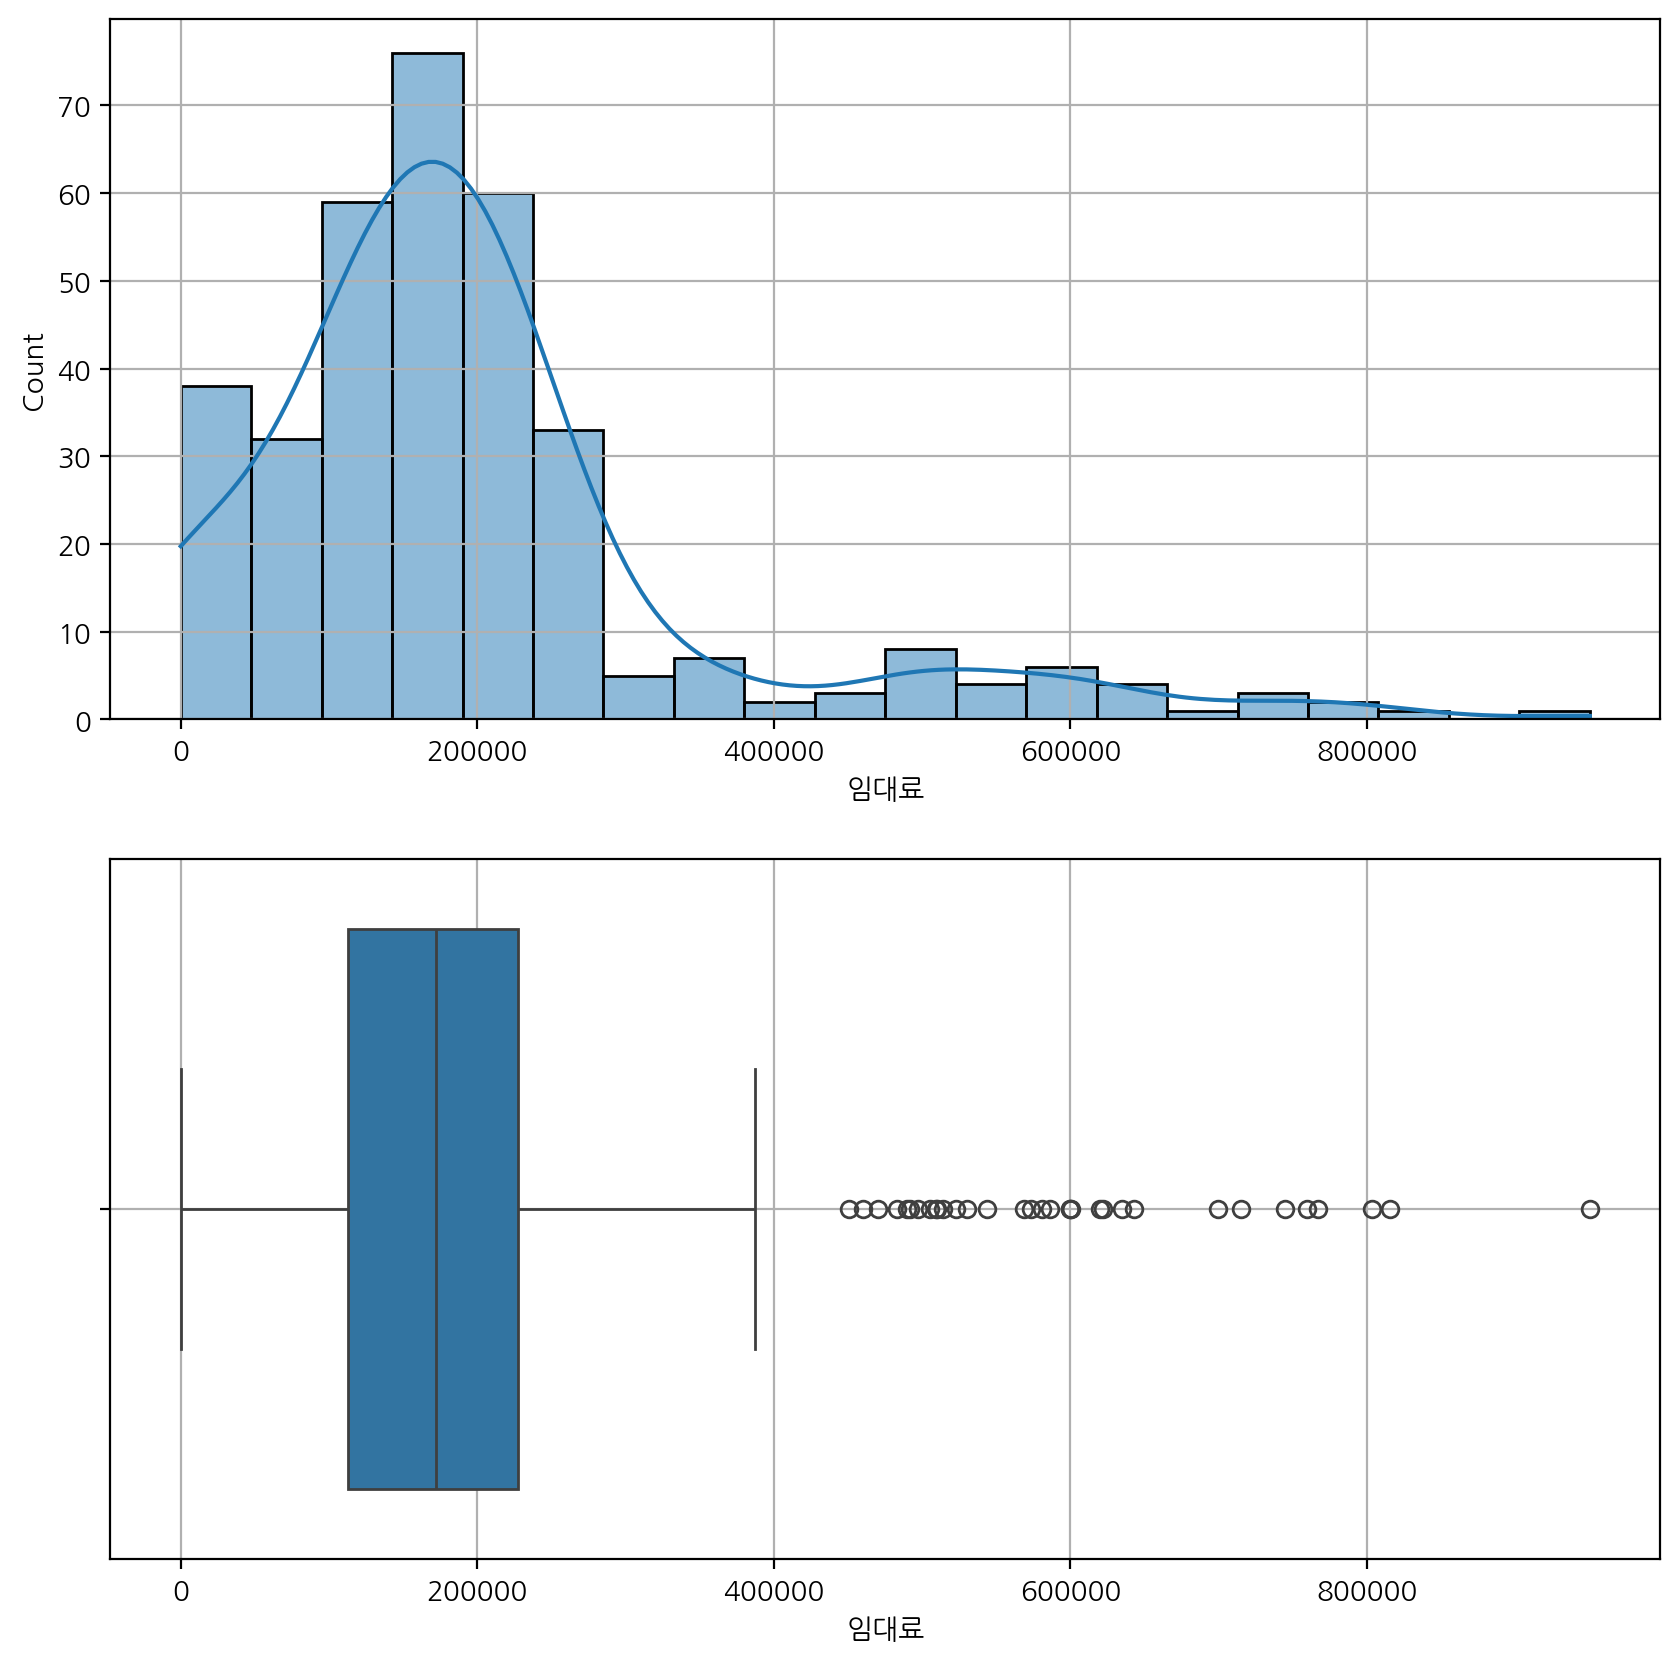

In [83]:
continuous(apart['임대료'])


#### 6) 임대보증금

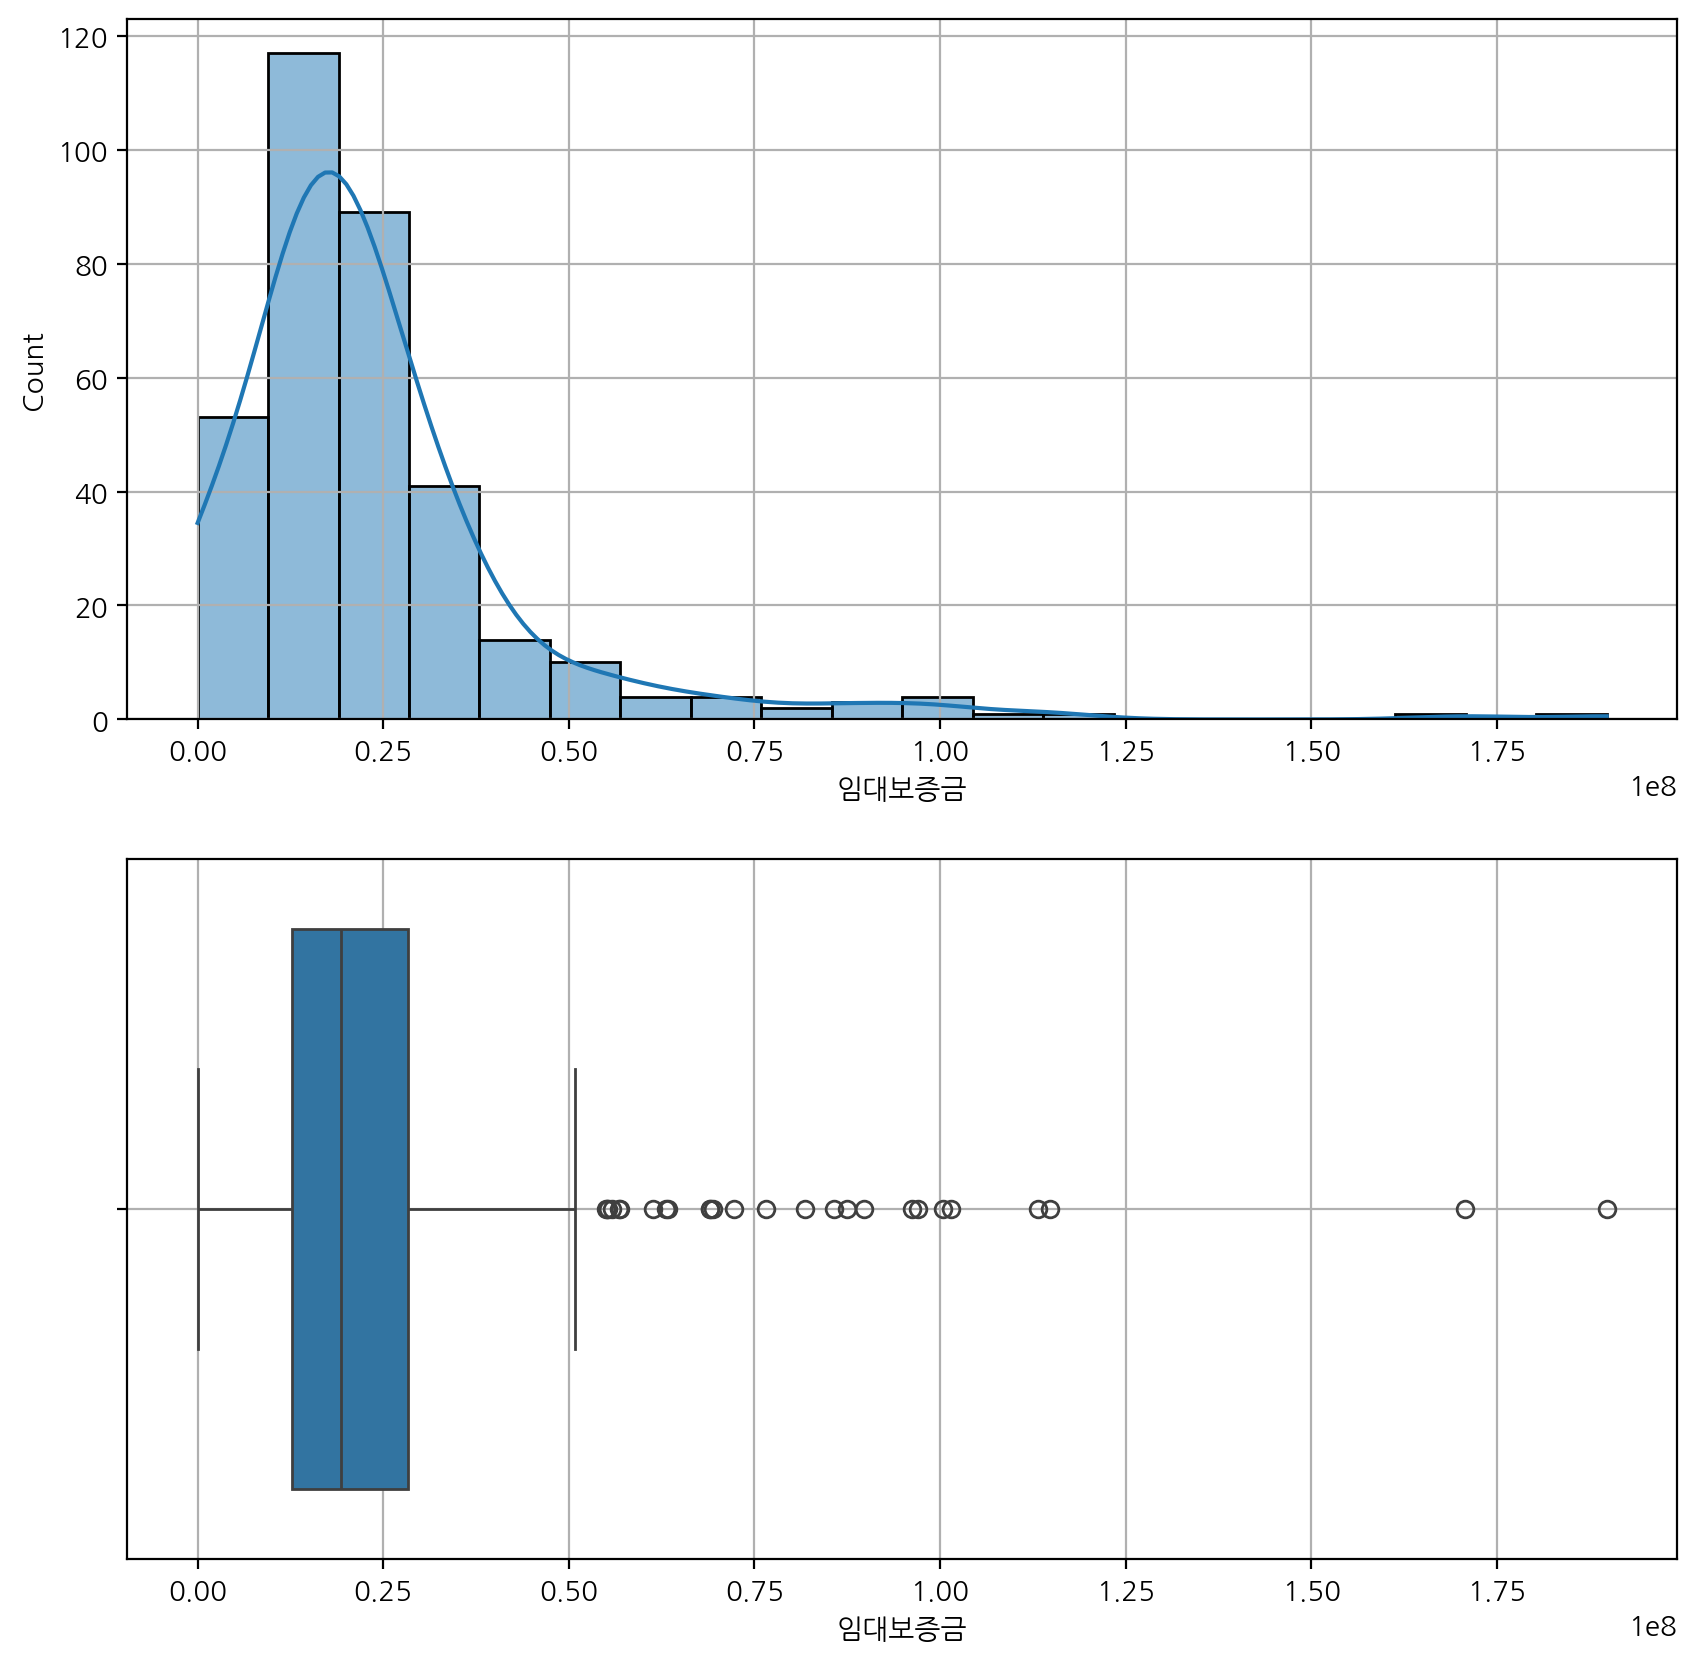

In [85]:
continuous(apart['임대보증금'])


### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [96]:
# 함수 만들기
def catergorical(col):
    plt.figure(figsize=(10,6))
    sns.countplot(x=col)
    plt.grid()
    plt.show()


#### 1) 지역

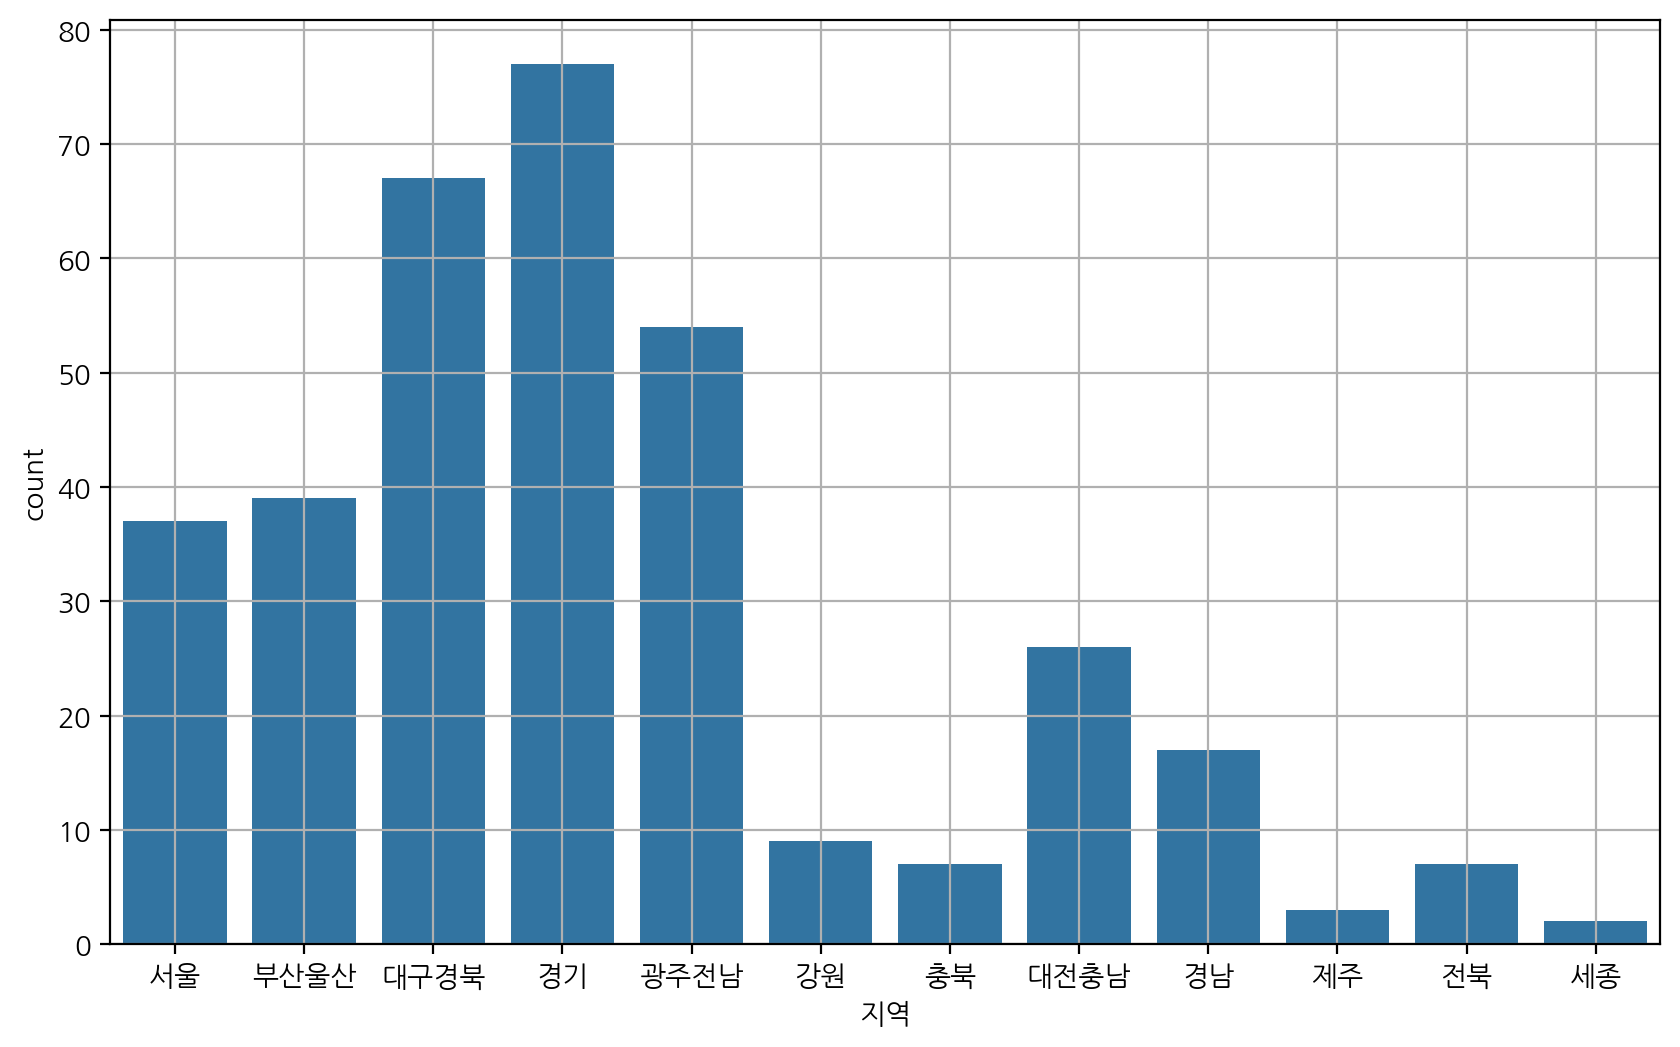

In [98]:
catergorical(apart['지역'])


#### 2) 건물형태

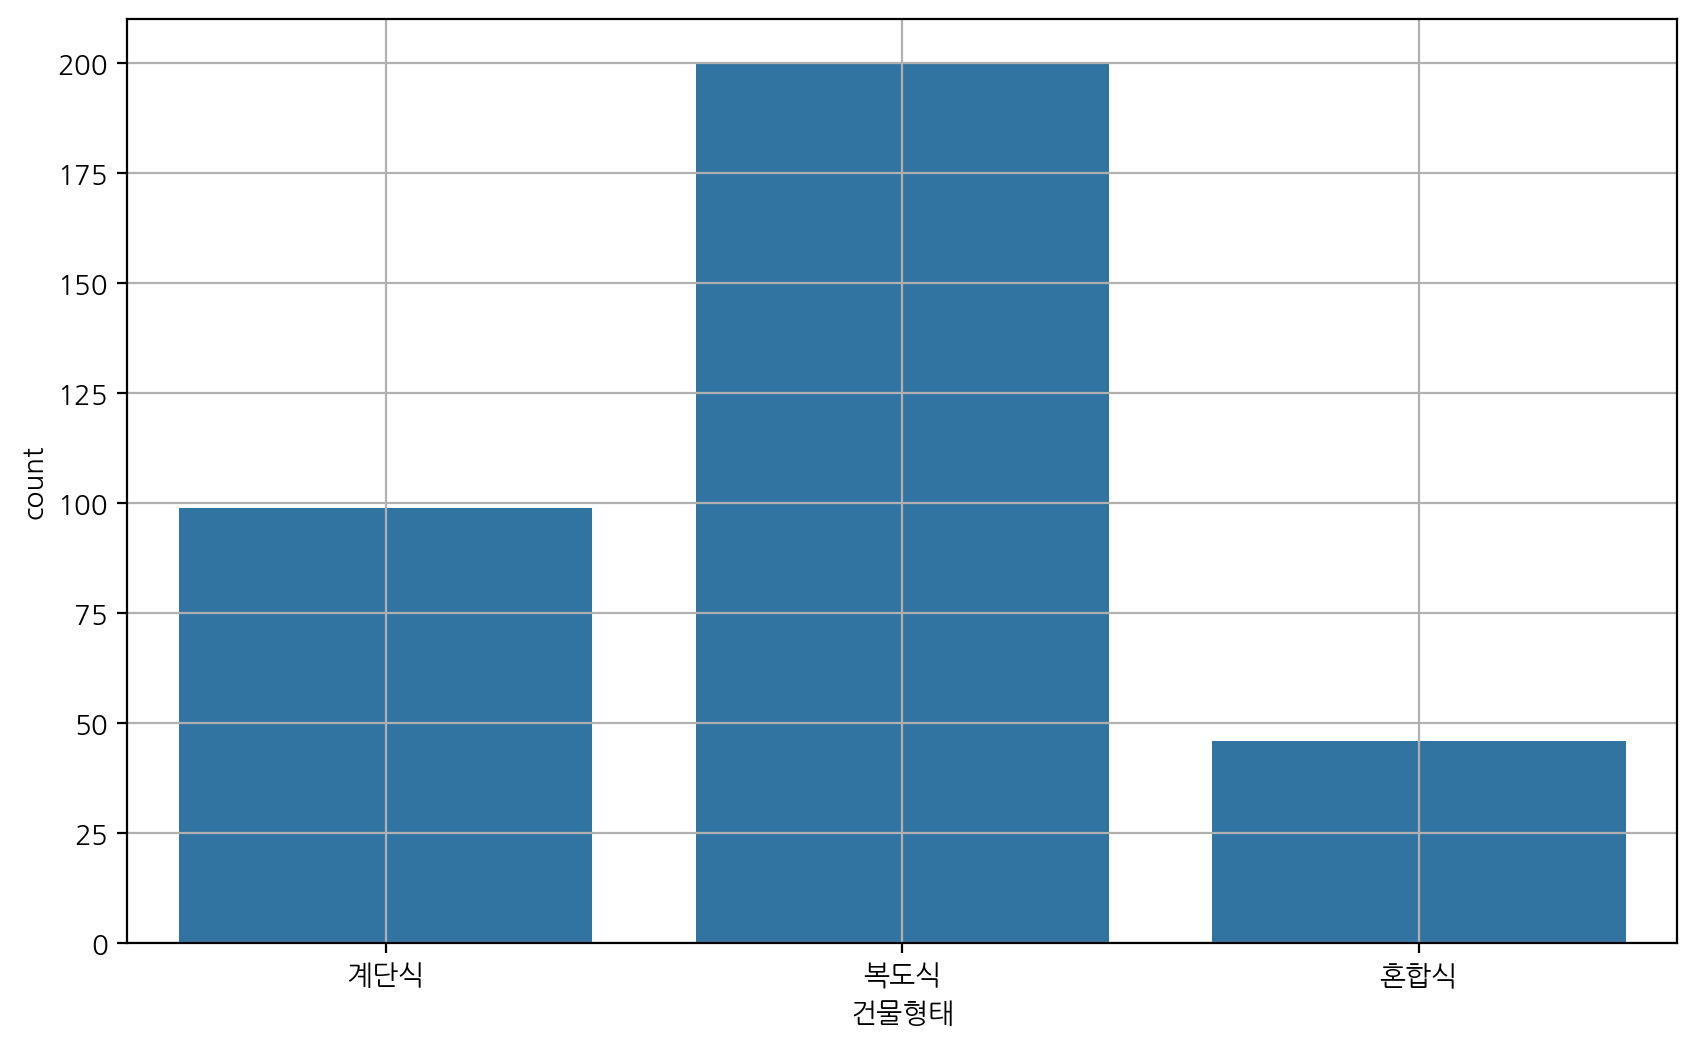

In [100]:
catergorical(apart['건물형태'])


#### 3) 난방방식

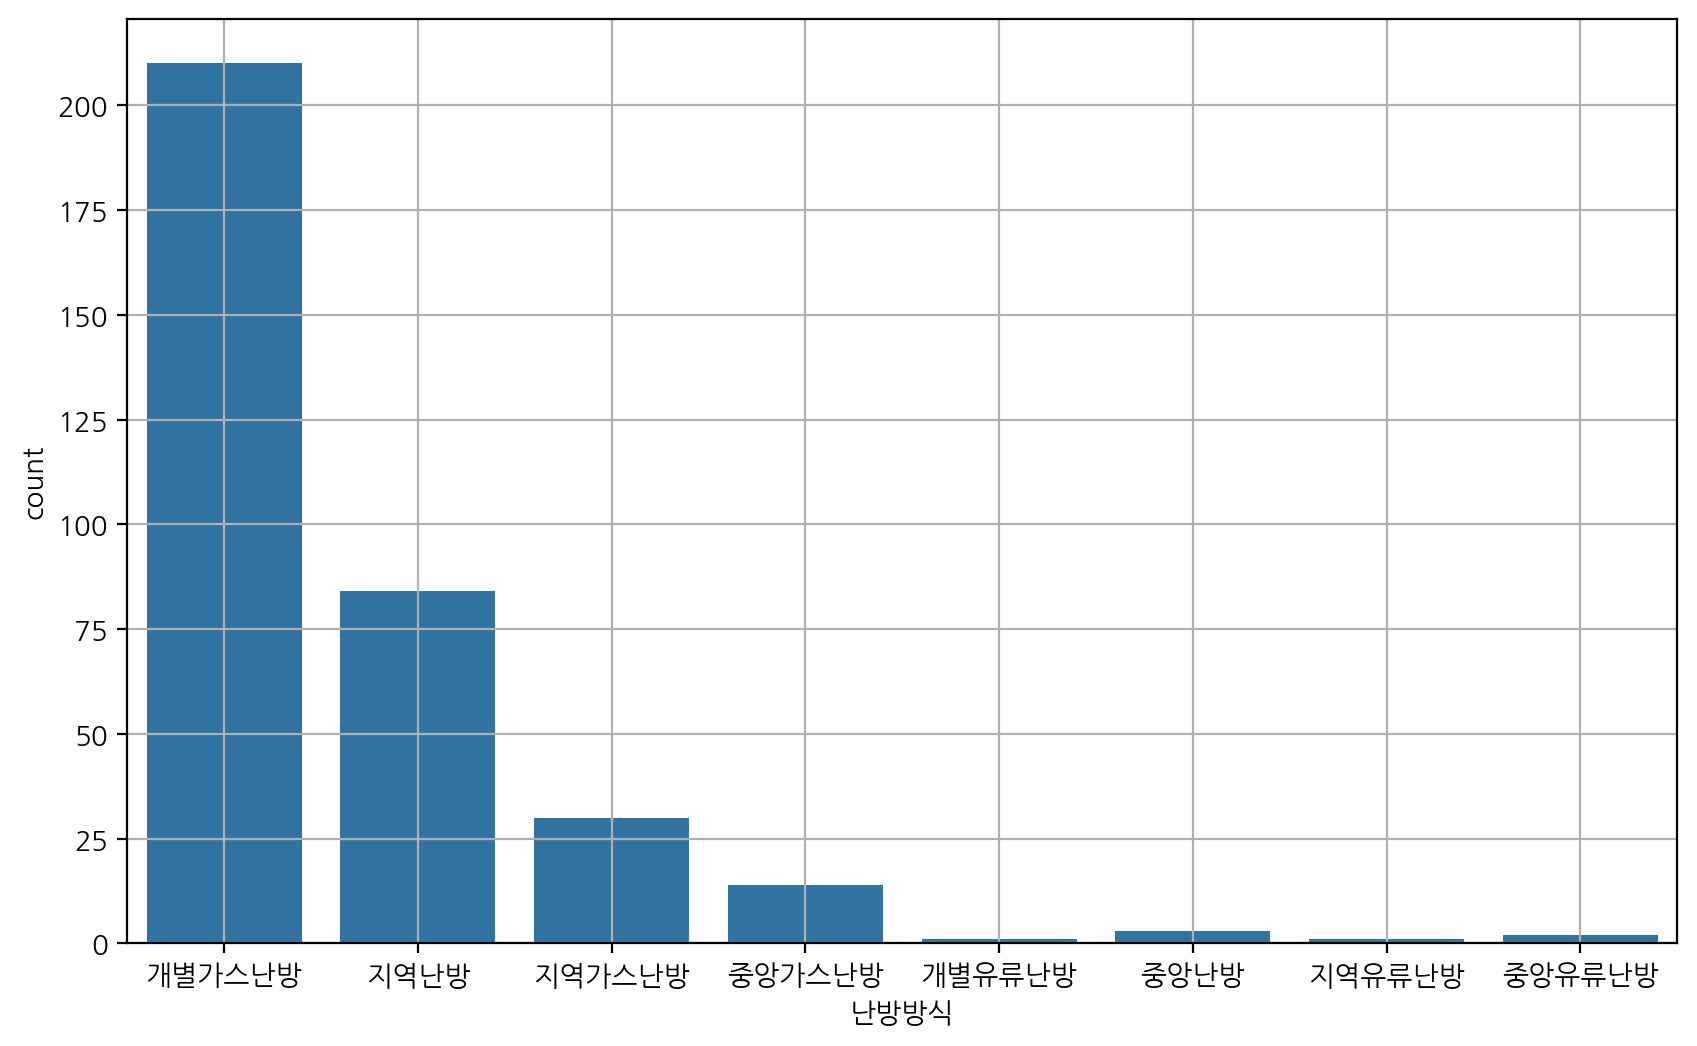

In [102]:
catergorical(apart['난방방식'])


#### 4) 승강기설치여부

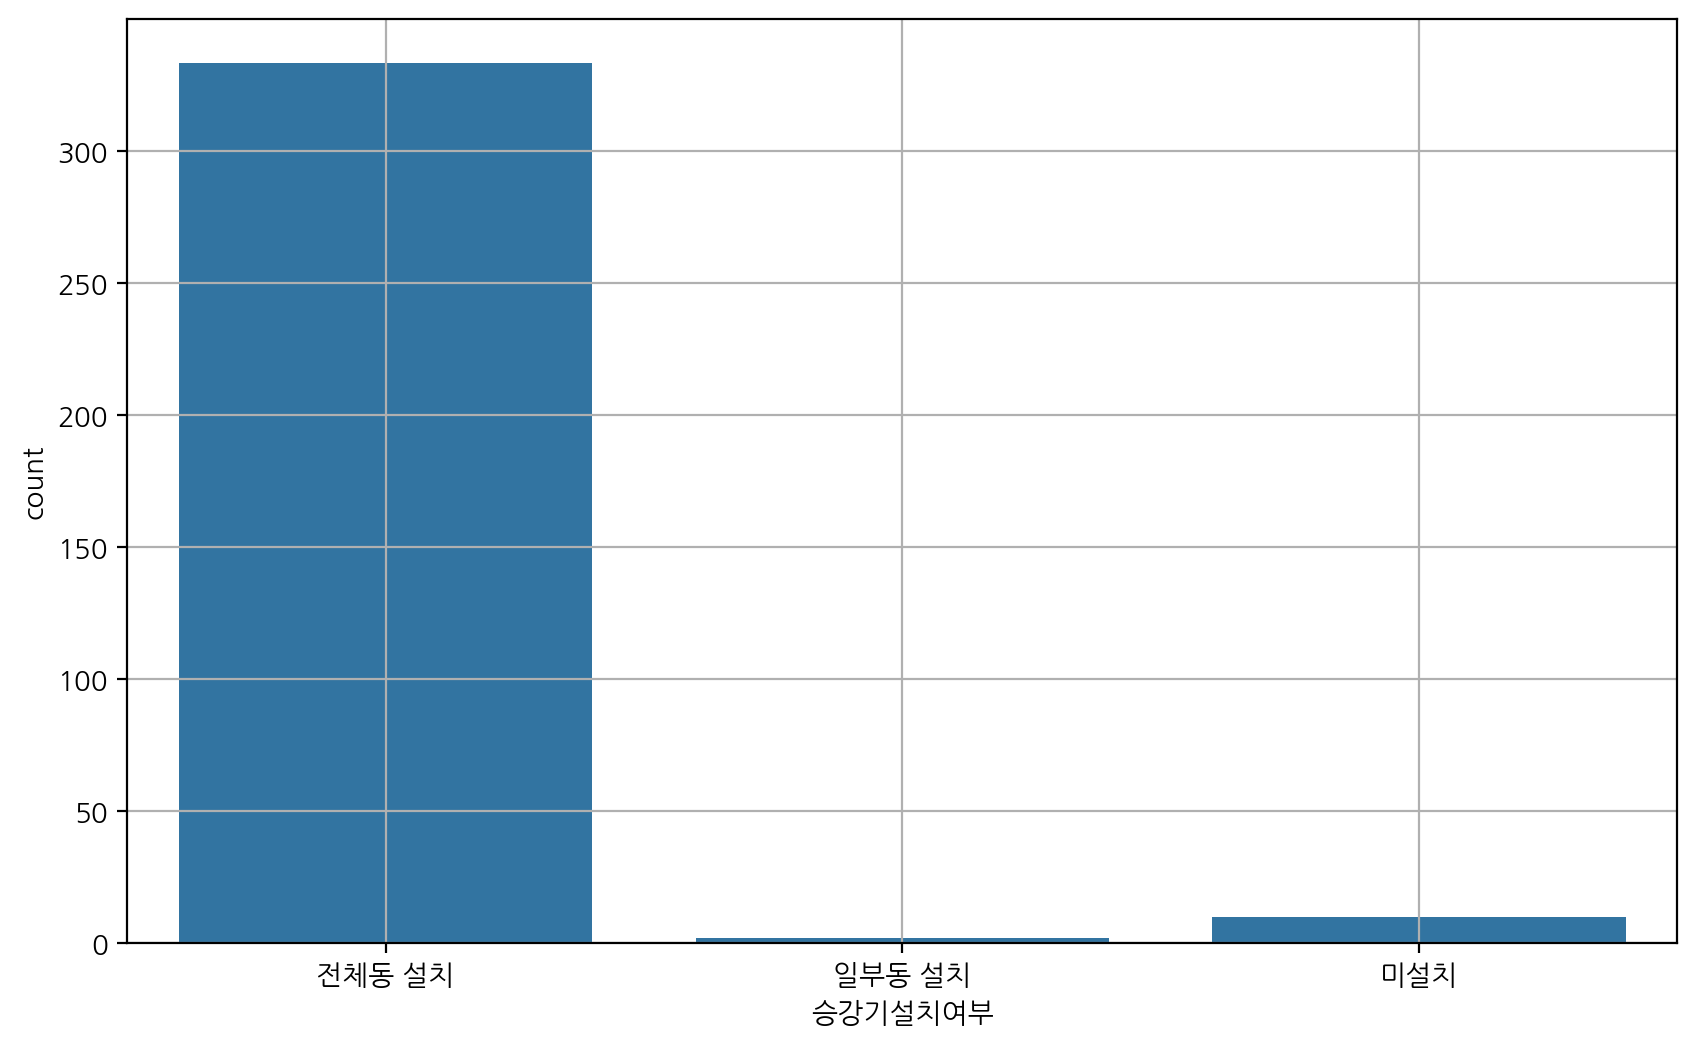

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,56962000,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,63062000,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,72190000,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,101516666,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,55227500,340148.333333


In [136]:
catergorical(apart['승강기설치여부'])
apart.head()

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

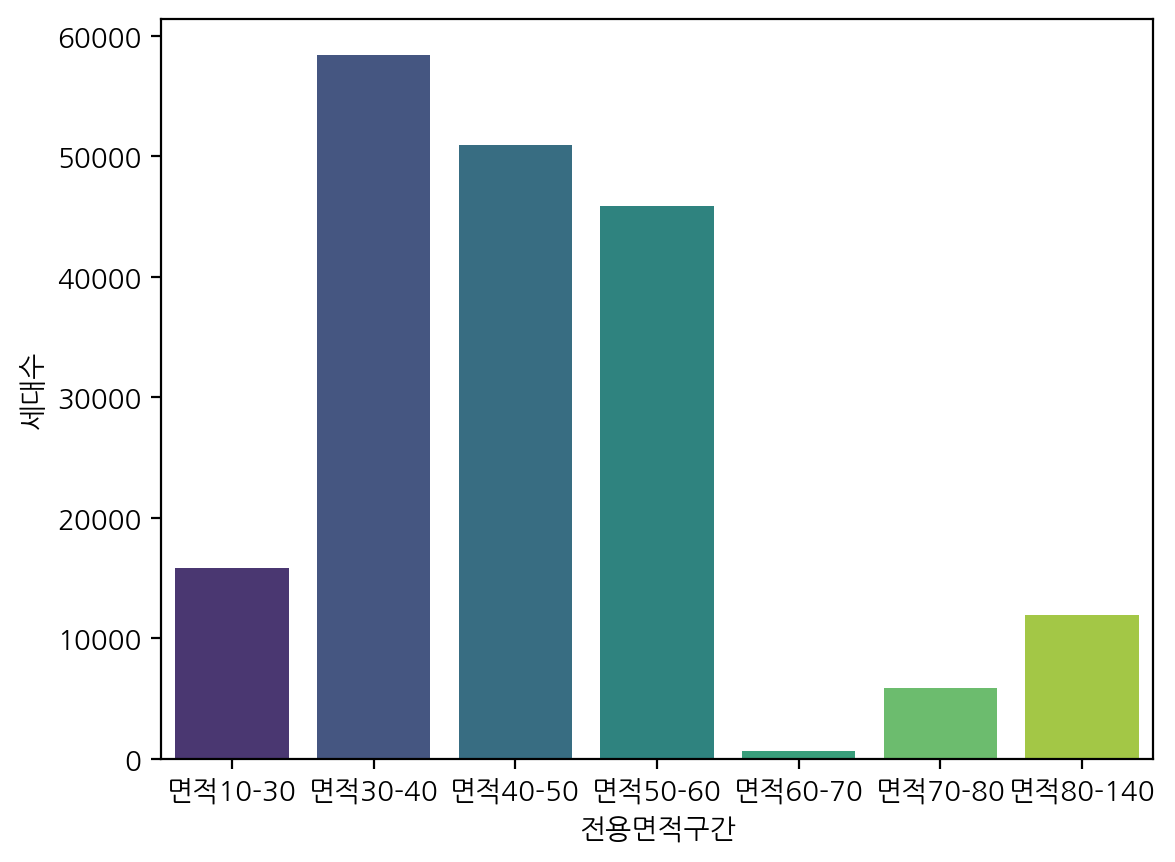

In [261]:
apart.head()
area_num = pd.melt(apart, 
           value_vars=['면적10-30', '면적30-40', '면적40-50', '면적50-60', '면적60-70', '면적70-80', '면적80-140'],
           var_name='전용면적구간', value_name='세대수')

tmp = area_num.groupby('전용면적구간')[['세대수']].sum()

sns.barplot(data=tmp, x='전용면적구간', y='세대수', palette='viridis')
plt.show()

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

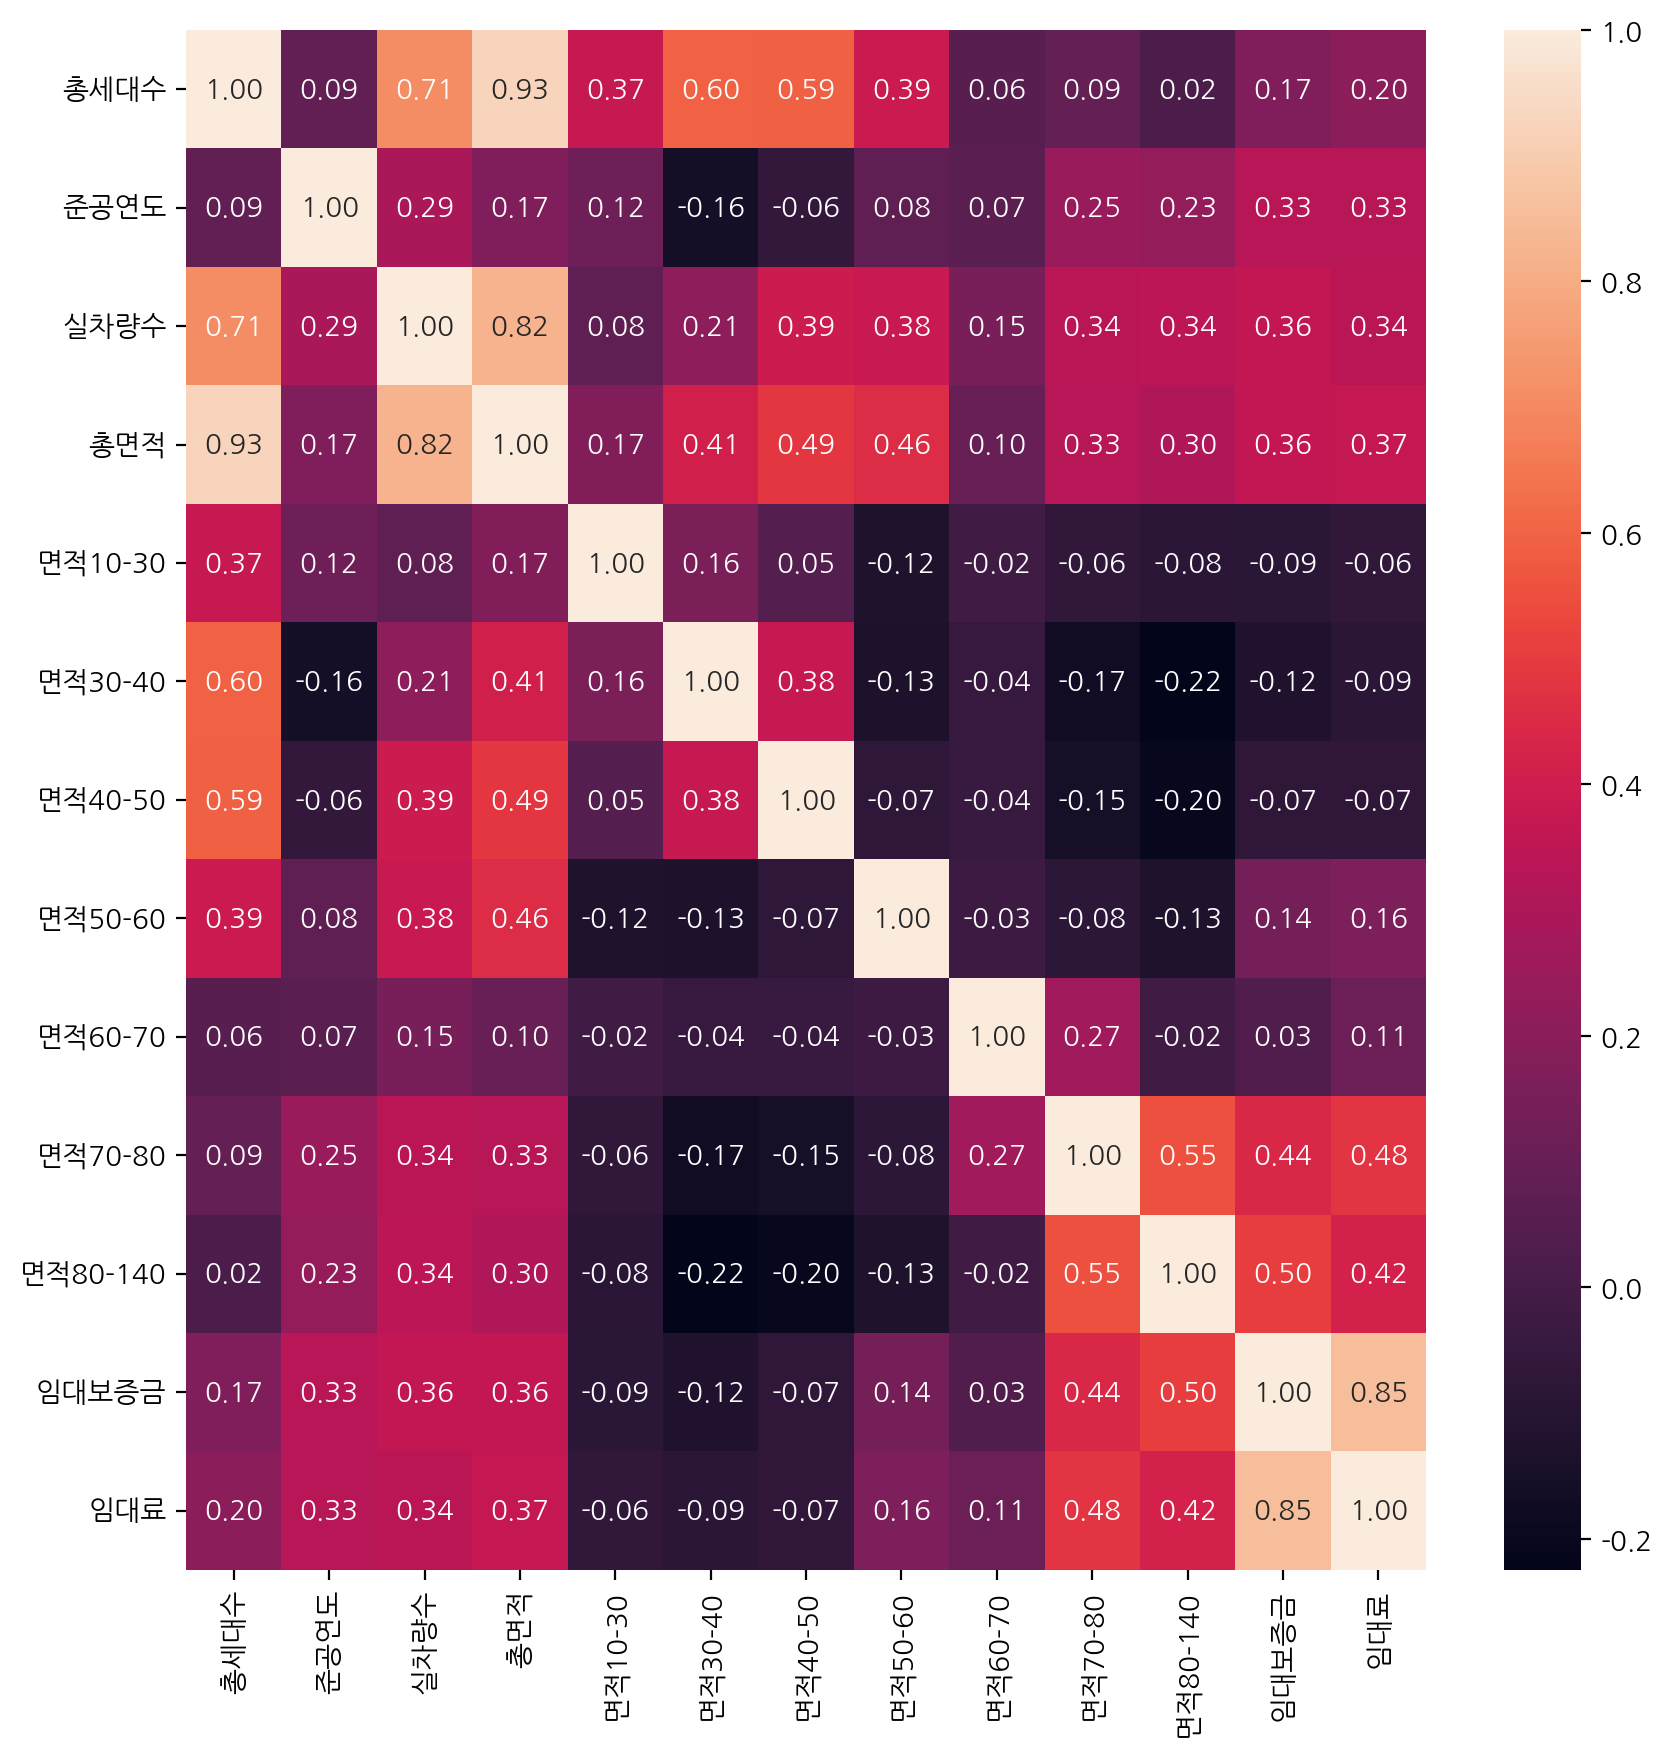

In [153]:
plt.figure(figsize = (10, 10))
sns.heatmap(
    apart.corr(numeric_only=True),
    annot = True,
    fmt = '.2f'
)
plt.show()

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [160]:
# 함수 만들기
target = '실차량수'

def between_continuous(col):
    sns.regplot(x=col, y=target, data=apart)
    plt.show()


In [278]:
apart.loc[apart['총세대수']*3 < apart['실차량수']]

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
5,C0007,69,부산울산,2014,계단식,개별,1,830,4802.4651,0,26,0,43,0,0,0,28780333,450920.000000
6,C0008,86,부산울산,2011,계단식,개별,1,892,6409.9462,0,40,0,46,0,0,0,0,0.000000
7,C0009,39,부산울산,2007,계단식,개별,1,744,4341.8700,0,0,0,0,0,0,39,0,0.000000
8,C0010,26,부산울산,2012,계단식,지역,1,363,1967.5058,0,26,0,0,0,0,0,0,0.000000
9,C0011,46,부산울산,2007,계단식,개별,1,632,5031.3328,0,0,0,0,0,0,46,0,0.000000
11,C0013,160,대구경북,2014,계단식,지역,1,556,20155.8967,0,0,0,0,0,65,124,36094000,634472.500000
13,C0015,5,대구경북,2007,계단식,개별,1,100,509.6000,0,0,0,0,0,0,5,0,0.000000
14,C0016,114,대구경북,2010,계단식,개별,1,946,12859.2420,0,0,0,0,0,0,114,0,0.000000
15,C0018,6,대구경북,2008,계단식,개별,1,516,680.1726,0,0,0,0,0,0,6,0,0.000000
16,C0019,15,대구경북,2007,계단식,개별,1,120,1737.8325,0,0,0,0,0,0,15,0,0.000000


#### 1) 변수이름

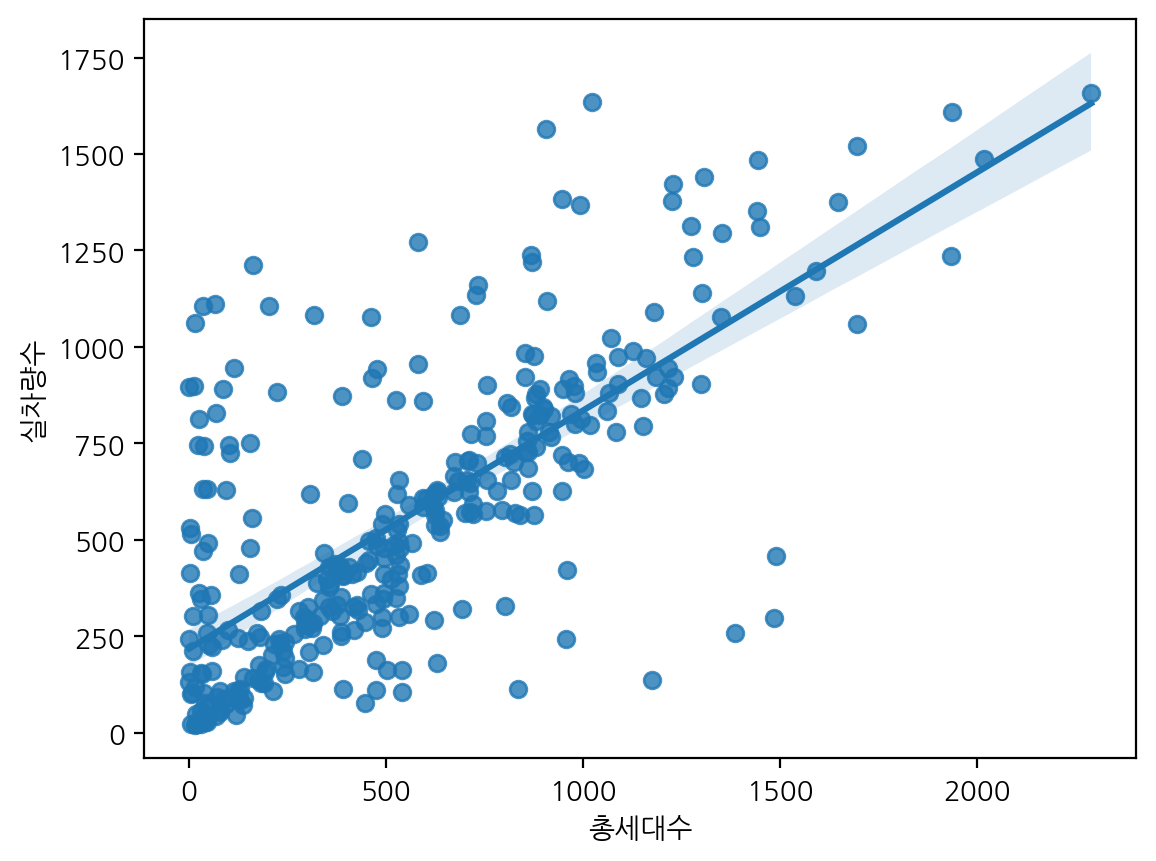

In [162]:
between_continuous('총세대수')


#### 2) 변수이름

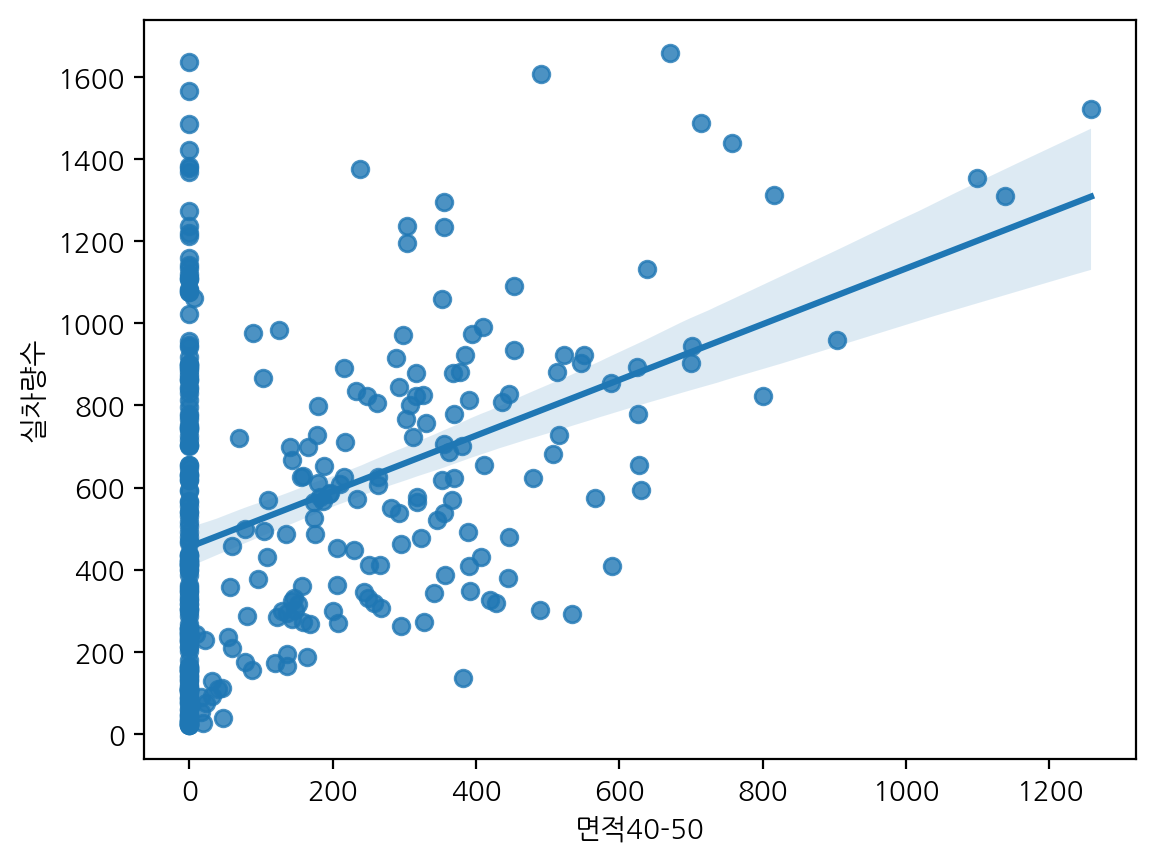

In [166]:
between_continuous('면적40-50')


#### 3) 변수이름

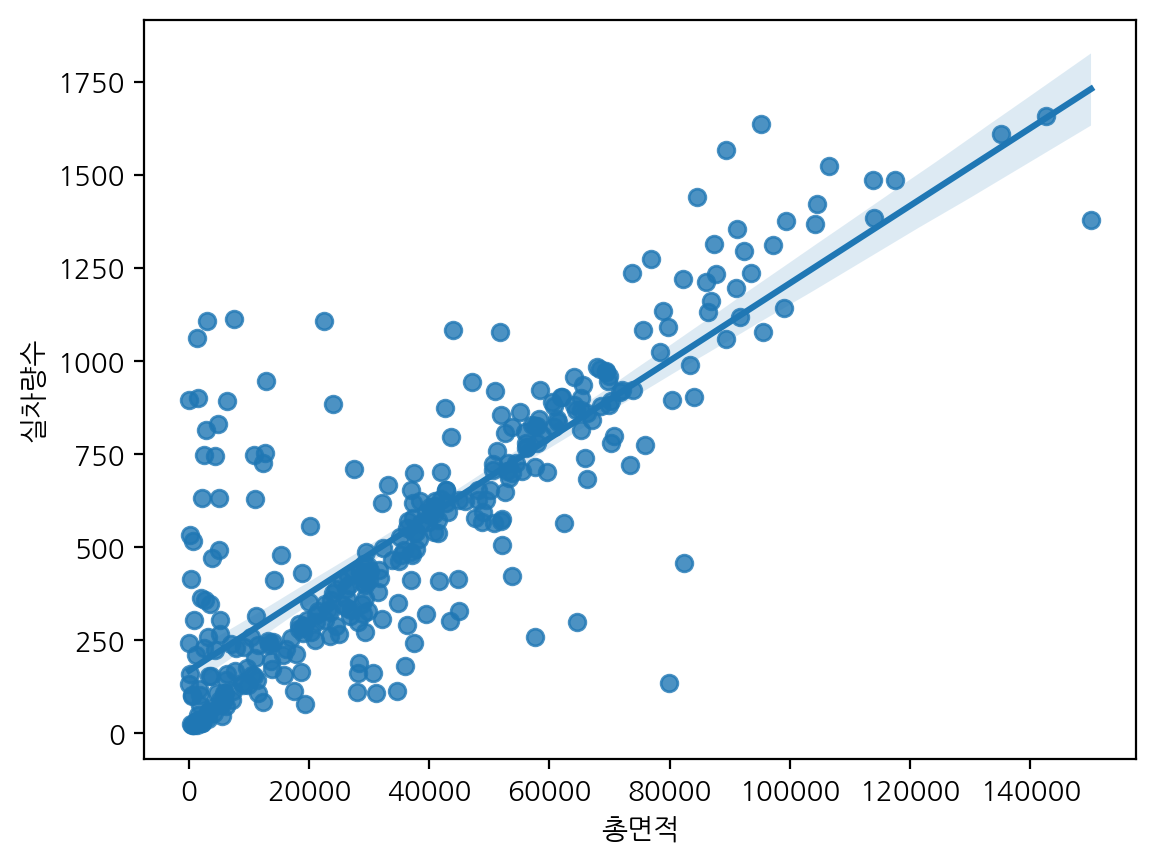

In [164]:
between_continuous('총면적')


#### 4) 변수이름

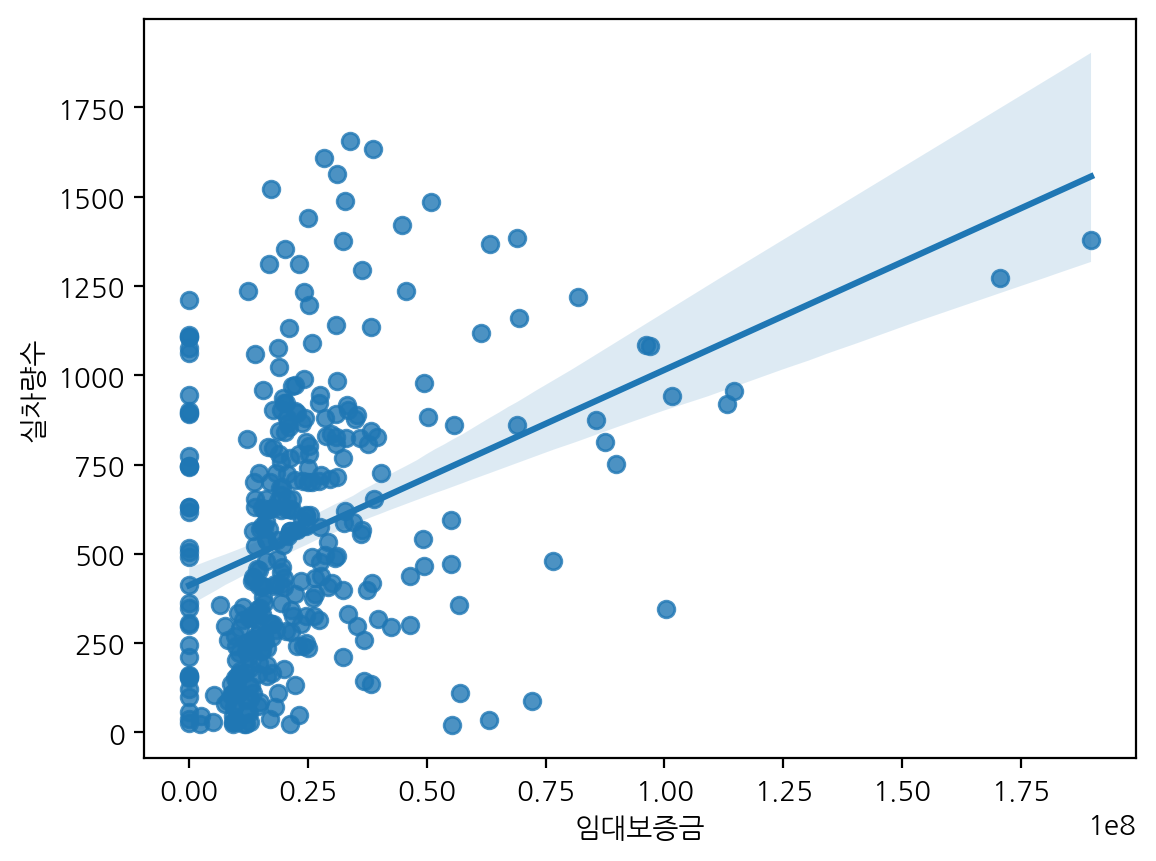

In [168]:
between_continuous('임대보증금')


#### 5) 변수이름

In [290]:
print(apart.shape)
apart.loc[apart['임대보증금']==0].count()

(345, 18)


단지코드        36
총세대수        36
지역          36
준공연도        36
건물형태        36
난방방식        36
승강기설치여부     36
실차량수        36
총면적         36
면적10-30     36
면적30-40     36
면적40-50     36
면적50-60     36
면적60-70     36
면적70-80     36
면적80-140    36
임대보증금       36
임대료         36
dtype: int64

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [217]:
# 함수 만들기
target = '실차량수'

def with_category(col):
    sns.barplot(x=col, y=target, data=apart)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


#### 1) 지역

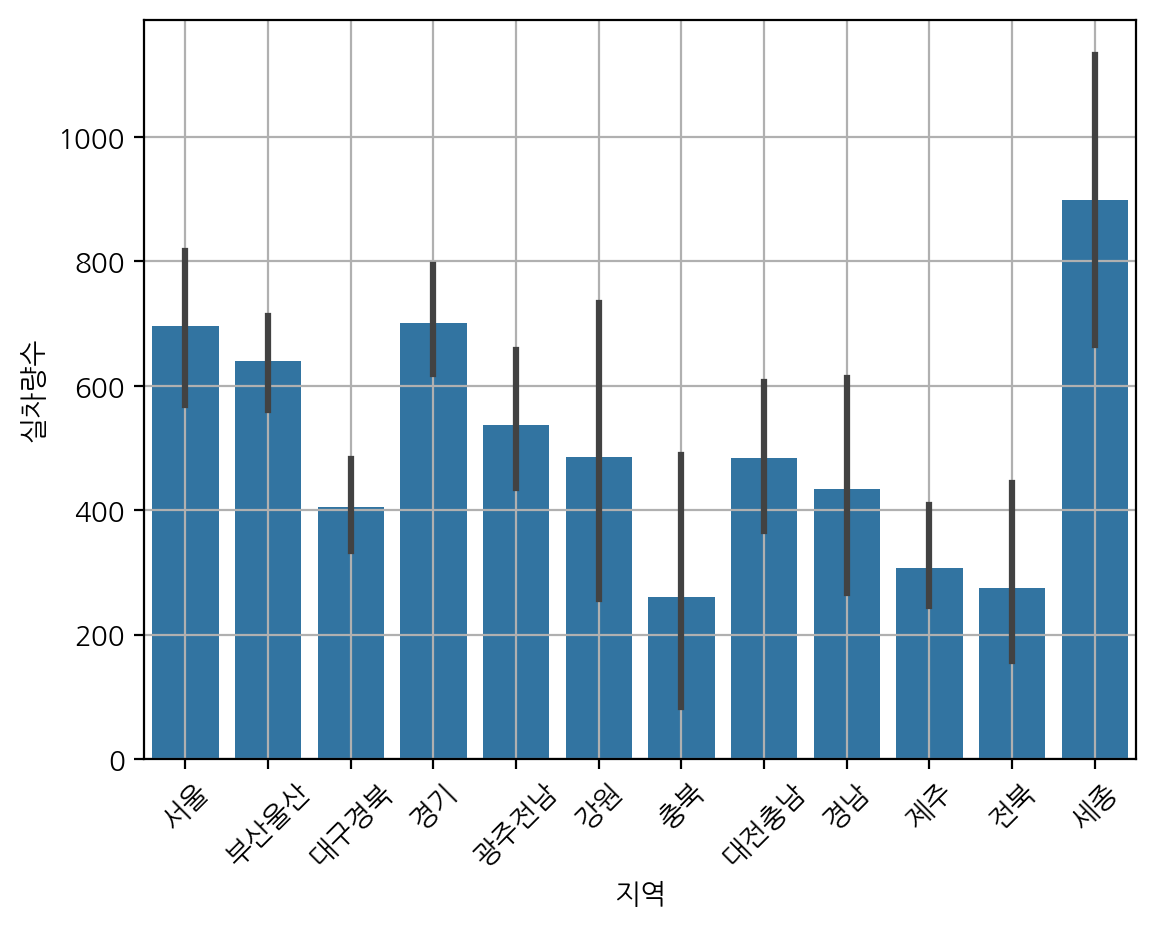

In [219]:
with_category('지역')


#### 2) 준공연도

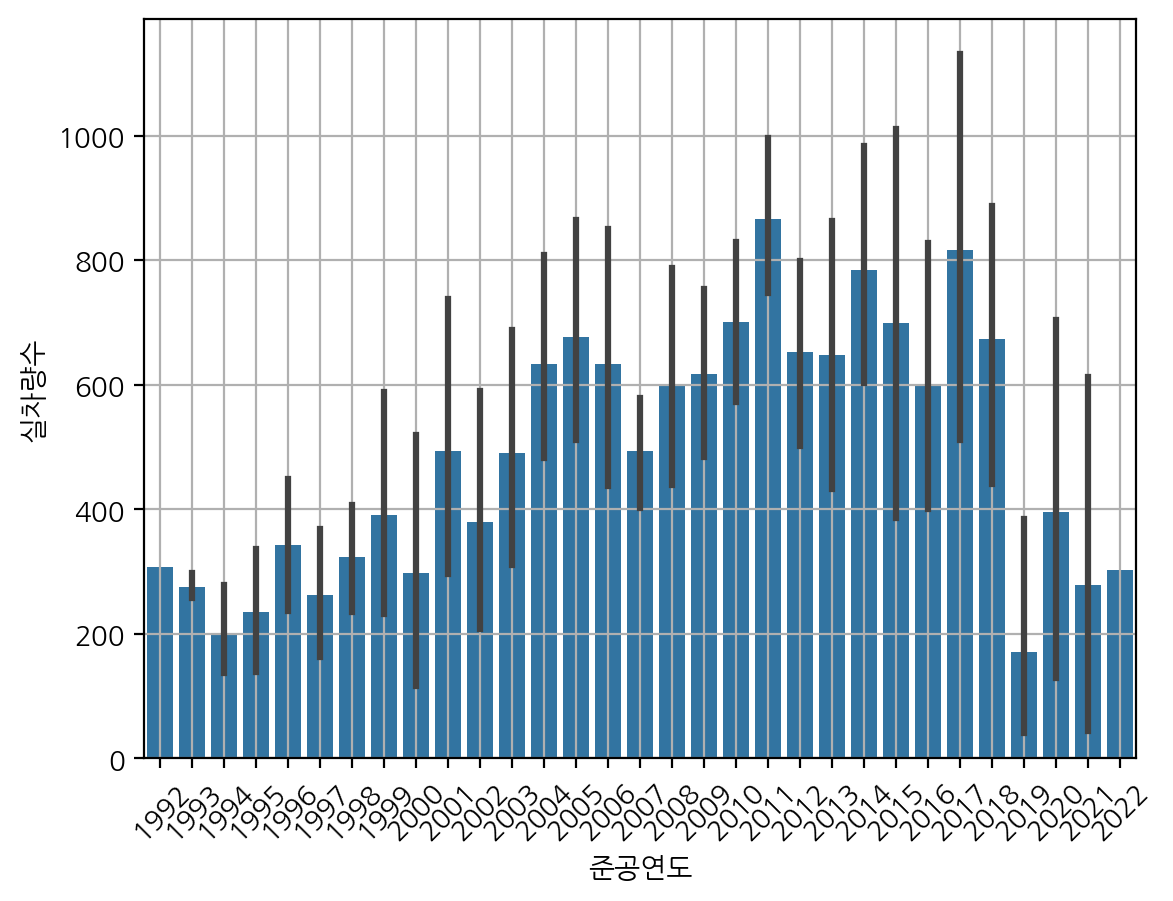

In [221]:
with_category('준공연도')


#### 3) 건물형태

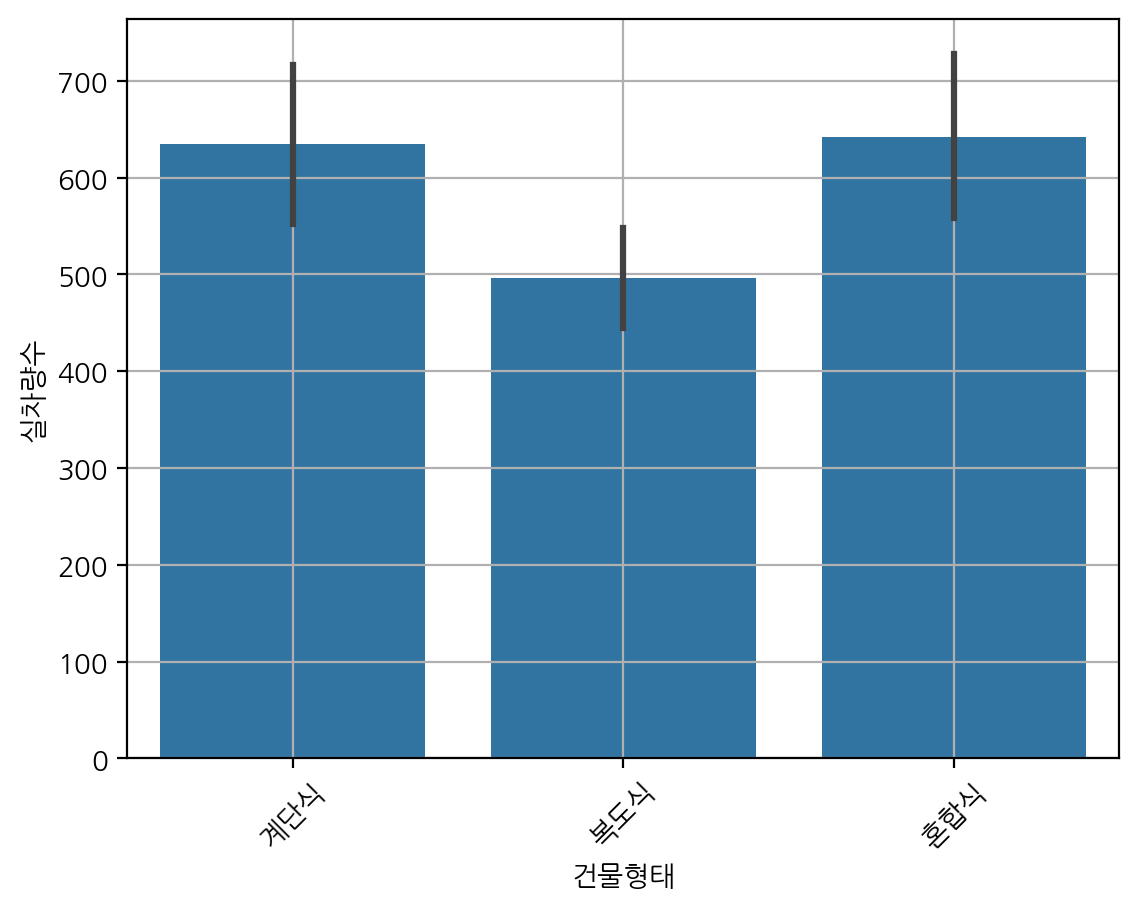

In [223]:
with_category('건물형태')


#### 4) 난방방식

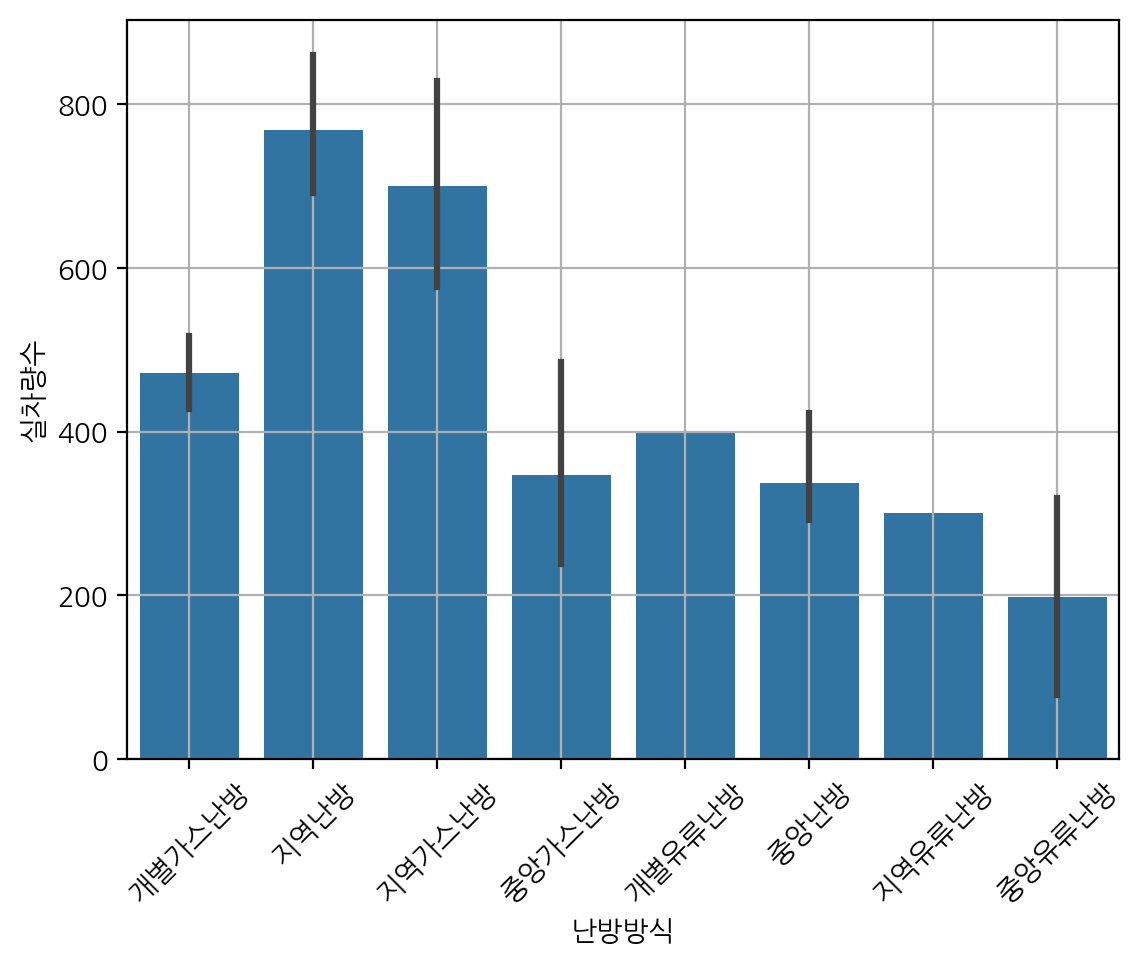

In [225]:
with_category('난방방식')


#### 5) 승강기설치여부

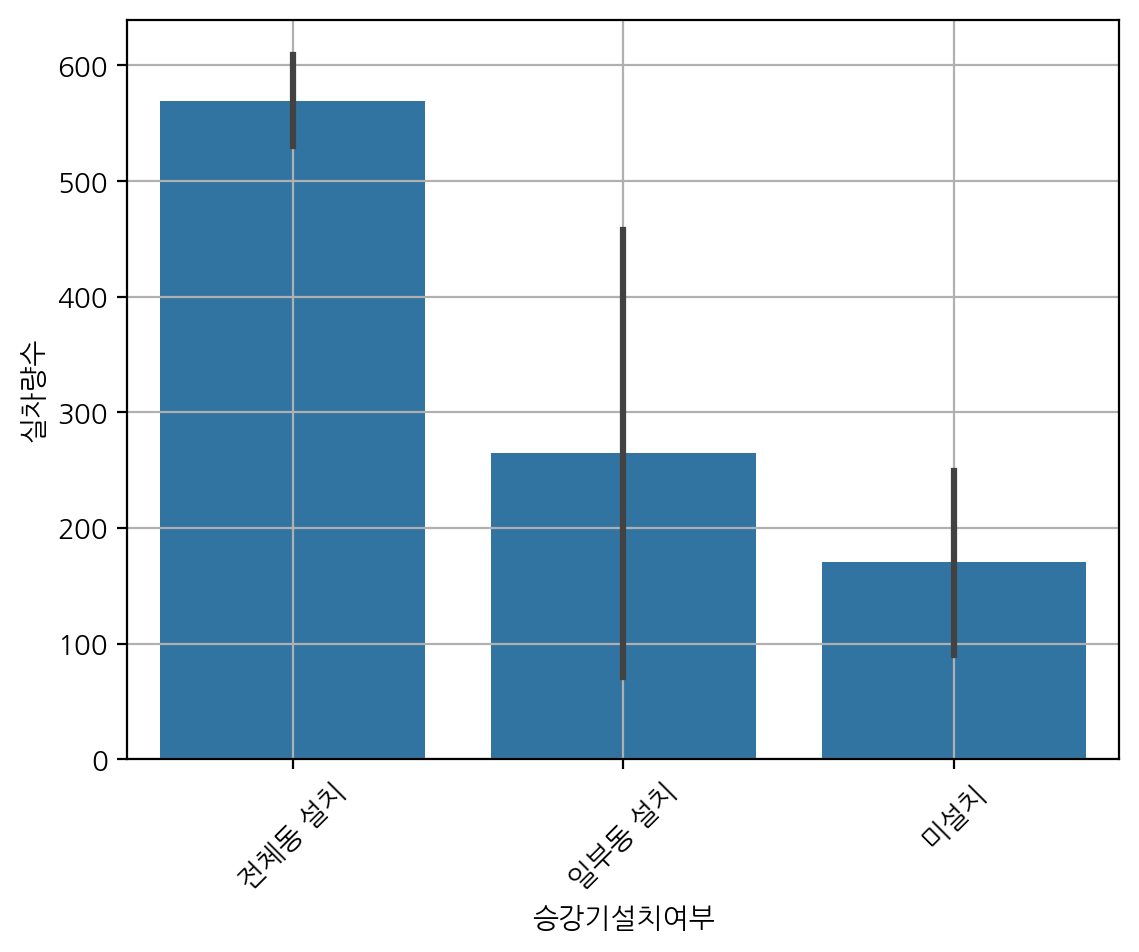

In [227]:
with_category('승강기설치여부')


## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

In [263]:
apart.head(3)

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,56962000,642930.0
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,63062000,470100.0
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,72190000,586540.0


### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [265]:
apart['난방방식'] = apart['난방방식'].astype(str).str[:2]
apart.head(15)

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,56962000,642930.000000
1,C0002,35,서울,2013,복도식,개별,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,63062000,470100.000000
2,C0003,88,서울,2013,계단식,개별,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,72190000,586540.000000
3,C0004,477,서울,2014,복도식,지역,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,101516666,950305.000000
4,C0006,15,서울,2013,복도식,개별,전체동 설치,21,543.0268,15,0,0,0,0,0,0,55227500,340148.333333
5,C0007,69,부산울산,2014,계단식,개별,전체동 설치,830,4802.4651,0,26,0,43,0,0,0,28780333,450920.000000
6,C0008,86,부산울산,2011,계단식,개별,전체동 설치,892,6409.9462,0,40,0,46,0,0,0,0,0.000000
7,C0009,39,부산울산,2007,계단식,개별,전체동 설치,744,4341.8700,0,0,0,0,0,0,39,0,0.000000
8,C0010,26,부산울산,2012,계단식,지역,전체동 설치,363,1967.5058,0,26,0,0,0,0,0,0,0.000000
9,C0011,46,부산울산,2007,계단식,개별,전체동 설치,632,5031.3328,0,0,0,0,0,0,46,0,0.000000


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [269]:
#apart['승강기설치여부'] = apart['승강기설치여부'].map({'전체동 설치' : 1, '일부동 설치' : 0, '미설치' : 0})
apart.head(30)
apart['승강기설치여부'].value_counts()

승강기설치여부
1    333
0     12
Name: count, dtype: int64

In [293]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,56962000,642930.000000
1,C0002,35,서울,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,63062000,470100.000000
2,C0003,88,서울,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,72190000,586540.000000
3,C0004,477,서울,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,101516666,950305.000000
4,C0006,15,서울,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,55227500,340148.333333


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [295]:
apart.drop(columns=['단지코드','지역'], inplace=True)


- 최종 데이터를 확인합니다.

In [297]:
apart.head()


,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10-30,면적30-40,면적40-50,면적50-60,면적60-70,면적70-80,면적80-140,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,56962000,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,63062000,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,72190000,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,101516666,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,55227500,340148.333333


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [299]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']